In [6]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
os.sys.path.append("C:\\Users\\mplitt\\s2p_processing")
import utilities as u
import preprocessing as pp
import single_session_plots as ssp
import numpy as np
import SimilarityMatrixAnalysis as sm
import PlaceCellAnalysis as pc
import scipy as sp
import matplotlib.pyplot as plt
import suite2p as s2p
import s2p_preprocessing as s2p_pp
import h5py

%load_ext autoreload
%autoreload 2

# %matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
df = pp.load_session_db(twop_dir = "G:\\My Drive\\2P_Data\\Syt3KO")
# df = pp.load_session_db()
df = df[df['RewardCount']>20]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

 

G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!
G:\My Drive\VR_Data\TwoTower\4222168.1\09_08_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!
G:\My Drive\VR_Data\TwoTower\4222169.2\26_08_2019\TwoTower_Timeout_0.sqlite
file doesn't exist, errors to come!!!
G:\My Drive\VR_Data\TwoTower\4261049.3\24_01_2020\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!


In [8]:
mouse = '4343707'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse

MouseName  DateFolder  SessionNumber               Track  RewardCount  \
3288   4343707  04_02_2020              2  TwoTower_noTimeout           30   
3292   4343707  04_02_2020              6  TwoTower_noTimeout           89   

      Imaging ImagingRegion   DateTime  \
3288        1           CA1 2020-02-04   
3292        1           CA1 2020-02-04   

                                              data file scanfile  \
3288  G:\My Drive\VR_Data\TwoTower\4343707\04_02_202...     None   
3292  G:\My Drive\VR_Data\TwoTower\4343707\04_02_202...     None   

                                                scanmat  \
3288  G:\My Drive\2P_Data\Syt3KO\4343707\04_02_2020\...   
3292  G:\My Drive\2P_Data\Syt3KO\4343707\04_02_2020\...   

                                              s2pfolder  
3288  G:\My Drive\2P_Data\Syt3KO\4343707\04_02_2020\...  
3292  G:\My Drive\2P_Data\Syt3KO\4343707\04_02_2020\...

In [9]:
# load s2p ops

sess = df_mouse.iloc[-1]
print(sess['s2pfolder'])

G:\My Drive\2P_Data\Syt3KO\4343707\04_02_2020\TwoTower_noTimeout\TwoTower_noTimeout_006_027\suite2p


In [10]:
ops = np.load(os.path.join(sess['s2pfolder'],'ops1.npy')).item()
for k in ops.keys():
    print(k)

look_one_level_down
fast_disk
delete_bin
mesoscan
h5py
h5py_key
save_path0
save_folder
subfolders
nplanes
nchannels
functional_chan
tau
fs
force_sktiff
preclassify
save_mat
combined
aspect
do_bidiphase
bidiphase
do_registration
keep_movie_raw
nimg_init
batch_size
maxregshift
align_by_chan
reg_tif
reg_tif_chan2
subpixel
smooth_sigma
th_badframes
pad_fft
nonrigid
block_size
snr_thresh
maxregshiftNR
1Preg
spatial_hp
pre_smooth
spatial_taper
roidetect
sparse_mode
diameter
spatial_scale
connected
nbinned
max_iterations
threshold_scaling
max_overlap
high_pass
inner_neuropil_radius
min_neuropil_pixels
allow_overlap
chan2_thres
baseline
win_baseline
sig_baseline
prctile_baseline
neucoeff
xrange
yrange
data_path
save_path
ops_path
reg_file
reg_file_chan2
meanImg
meanImg_chan2
nframes
Ly
Lx
yblock
xblock
nblocks
NRsm
refImg
yoff
xoff
corrXY
yoff1
xoff1
corrXY1
badframes
regPC
regDX
tPC
max_proj
Lyc
Lxc
Vmap
Vcorr
spatscale_pix
Vmax
ihop
Vsplit
meanImgE
meanImgE_chan2


In [11]:
%matplotlib qt
f,ax = plt.subplots(1,2,figsize=[15,5])
ax[0].imshow(ops['meanImg'],cmap='gray')
ax[1].imshow(ops['meanImg_chan2'],cmap='gray')
f.show()

In [68]:
ops = s2p.utils.enhanced_mean_image(ops)

In [12]:
%matplotlib qt
f,ax = plt.subplots(1,2,figsize=[15,5])
ax[0].imshow(ops['meanImgE'],cmap='gray')
ax[1].imshow(ops['meanImgE_chan2'],cmap='gray')
f.show()

### try to align zstacks

In [13]:
%matplotlib inline

predir = "G:\\My Drive\\2P_Data\\Syt3KO\\4343707\\04_02_2020\\post"
scan = "post_003_023"

info = s2p_pp.loadmat(os.path.join(predir,scan + ".mat"))
print(info['config'])

_knobby_sched = np.array(info['config']['knobby']['schedule'])
knobby_z = np.zeros([_knobby_sched.shape[0]+1,])
knobby_z[1:]=np.cumsum(_knobby_sched[:,2])
print(knobby_z)
knobby_sched = np.zeros([_knobby_sched.shape[0]+2,])
knobby_sched[1:-1]=_knobby_sched[:,-1]
knobby_sched[-1]=info['max_idx']

print(knobby_sched)





    
# look at pre z stack

# check info file

# look every 300 frames

# convert to h5

# motion correct

# make new z stack h5


{'wavelength': 1100, 'frames': 3300, 'lines': 512, 'magnification': 1, 'magnification_list': array(['1.0', '1.2', '1.4', '1.7', '2.0', '2.4', '2.8', '3.4', '4.0',
       '4.8', '5.7', '6.7', '8.0'], dtype='<U3'), 'pmt0_gain': 0.68, 'pmt1_gain': 0.74, 'knobby': {'pos': {'x': 0, 'y': 0, 'z': 0, 'a': 10}, 'schedule': array([[   0,    0,  -10,    0,  300],
       [   0,    0,    2,    0,  600],
       [   0,    0,    2,    0,  900],
       [   0,    0,    2,    0, 1200],
       [   0,    0,    2,    0, 1500],
       [   0,    0,    2,    0, 1800],
       [   0,    0,    2,    0, 2100],
       [   0,    0,    2,    0, 2400],
       [   0,    0,    2,    0, 2700],
       [   0,    0,    2,    0, 3000]], dtype=int16)}}
[  0. -10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.]
[   0.  300.  600.  900. 1200. 1500. 1800. 2100. 2400. 2700. 3000. 3299.]


In [14]:
print(knobby_z)

[  0. -10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.]


In [15]:
ops=s2p_pp.default_ops()
ops['biphase']=0
ops['do_biphase']=False
stack = np.zeros([info['nChan'],knobby_sched.shape[0]-1,info['sz'][0],info['sz'][1]])
for i, (first,last) in enumerate(zip(knobby_sched[:-1].tolist(),knobby_sched[1:].tolist())):
    data =s2p_pp.sbxread(os.path.join(predir,scan),first+2,last-first-2)
    data = np.transpose(data,axes=(0,3,2,1))
    print(data.shape)
    for chan in range(info['nChan']):
        frames = np.squeeze(data[chan,:,:,:])
        refimg = s2p.register.pick_init_init(frames)
        refimg = s2p.register.refine_init(ops,frames,refimg)
        stack[chan,i,:,:]=refimg

    



1630208 298.0
3260416
(2, 298, 512, 796)
1630208 298.0
492322816
(2, 298, 512, 796)
1630208 298.0
981385216
(2, 298, 512, 796)
1630208 298.0
1470447616
(2, 298, 512, 796)
1630208 298.0
1959510016
(2, 298, 512, 796)
1630208 298.0
2448572416
(2, 298, 512, 796)
1630208 298.0
2937634816
(2, 298, 512, 796)
1630208 298.0
3426697216
(2, 298, 512, 796)
1630208 298.0
3915759616
(2, 298, 512, 796)
1630208 298.0
4404822016
(2, 298, 512, 796)
1630208 297.0
4893884416
(2, 297, 512, 796)


In [ ]:
print(stack.shape)

In [16]:
%matplotlib inline
for chan in range(info['nChan']):
    fname = os.path.join(predir,scan + "_chan%i.h5" % chan)
    with h5py.File(fname,"w") as f:
        dset = f.create_dataset("data",stack.shape[1:],dtype='int16')
        dset[:,:,:]=np.squeeze(stack[chan,:,:,:])
        f.flush()

C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


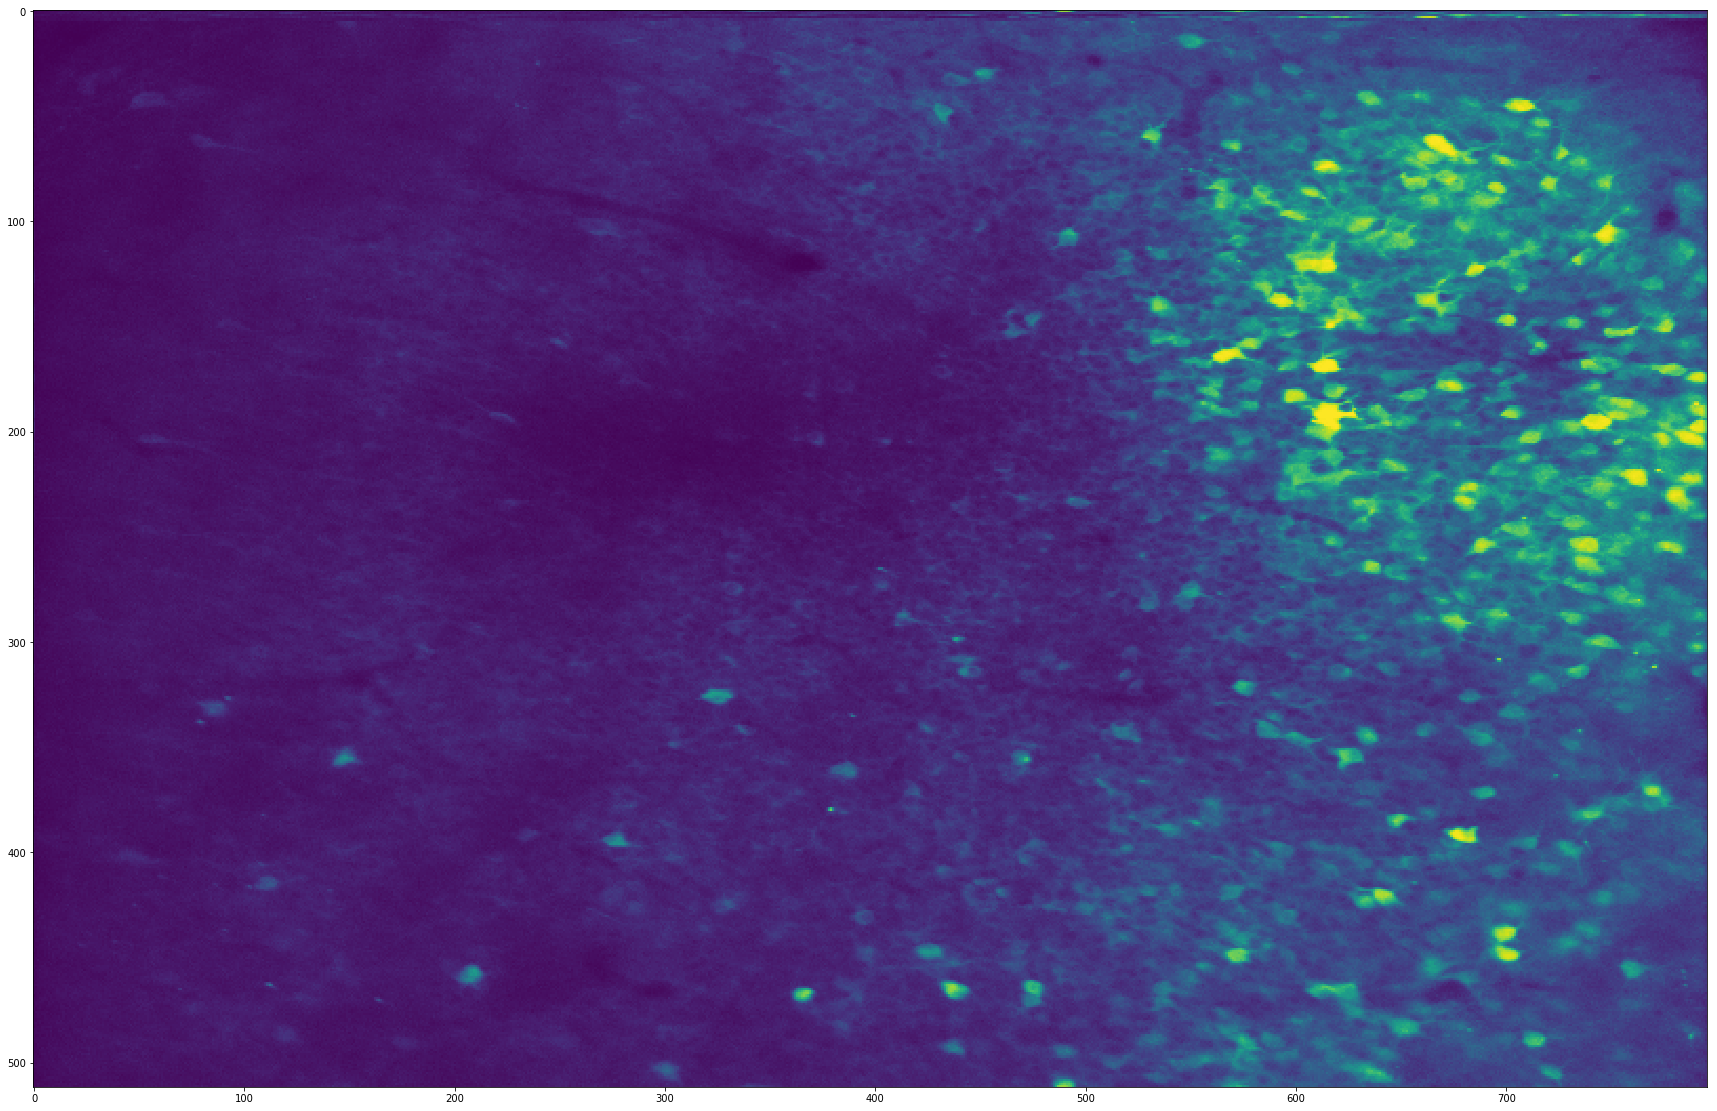

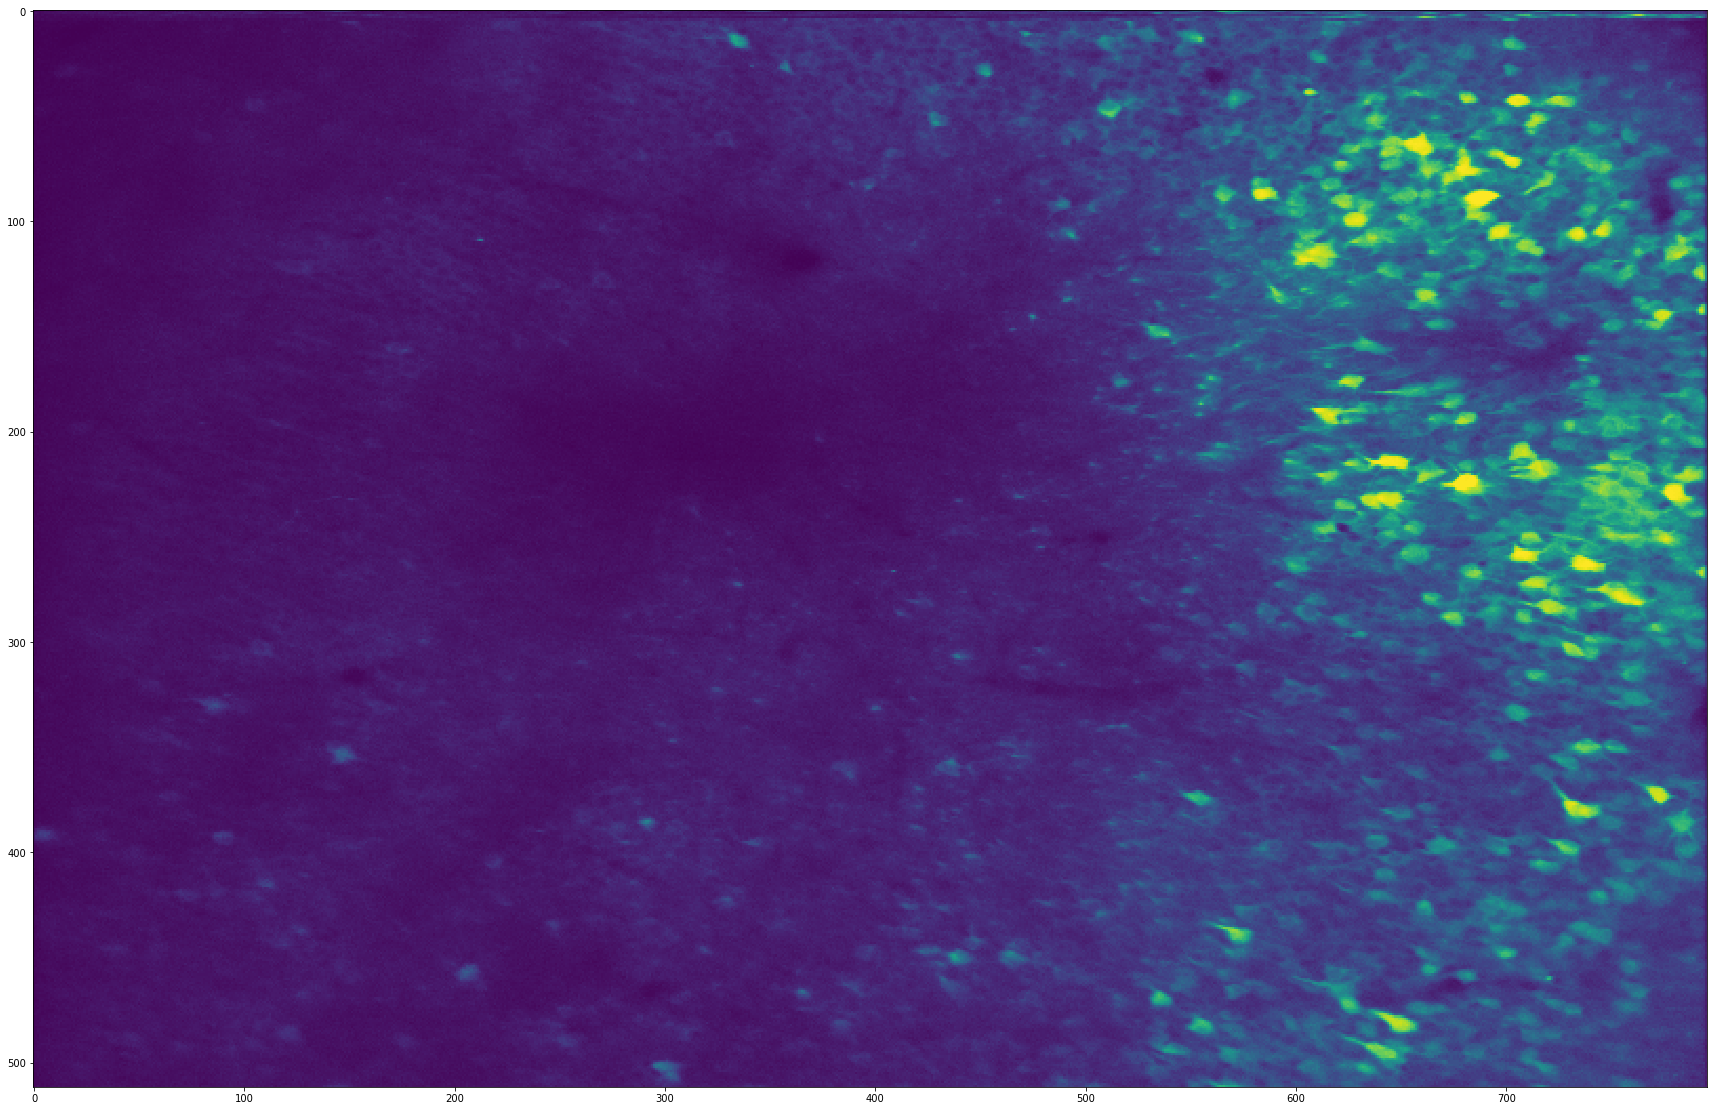

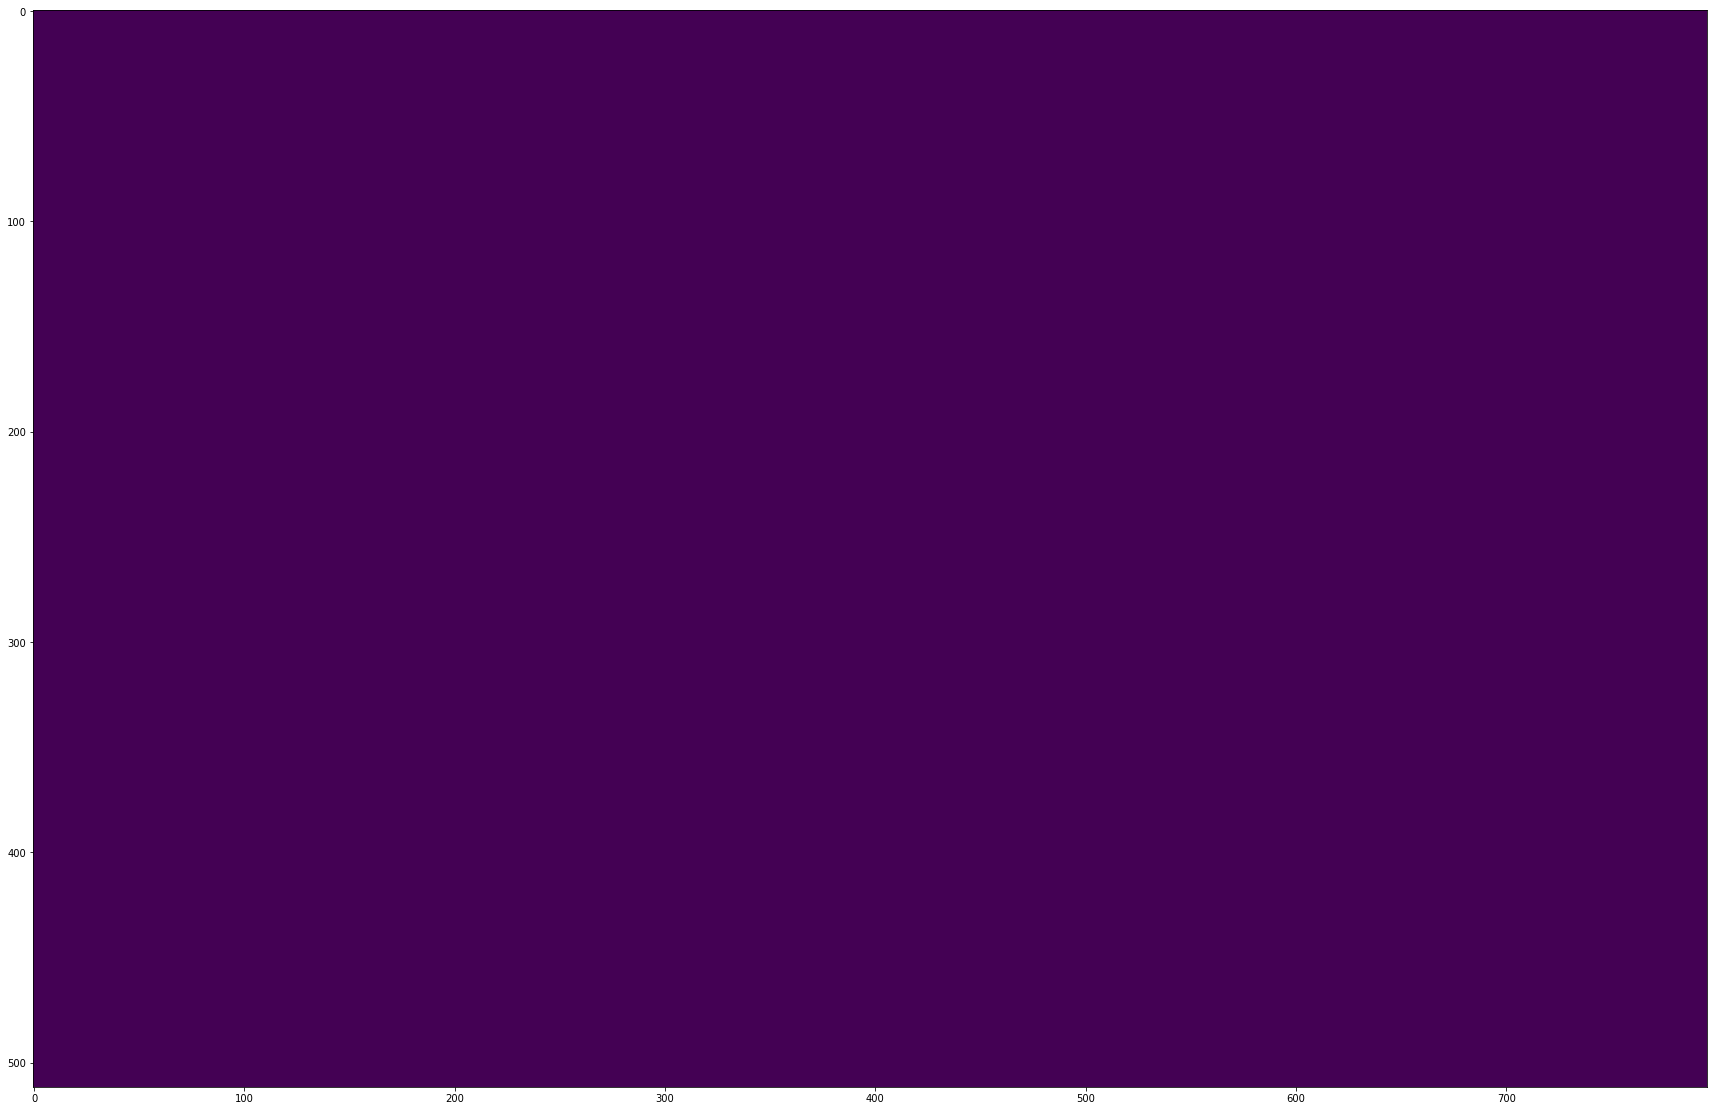

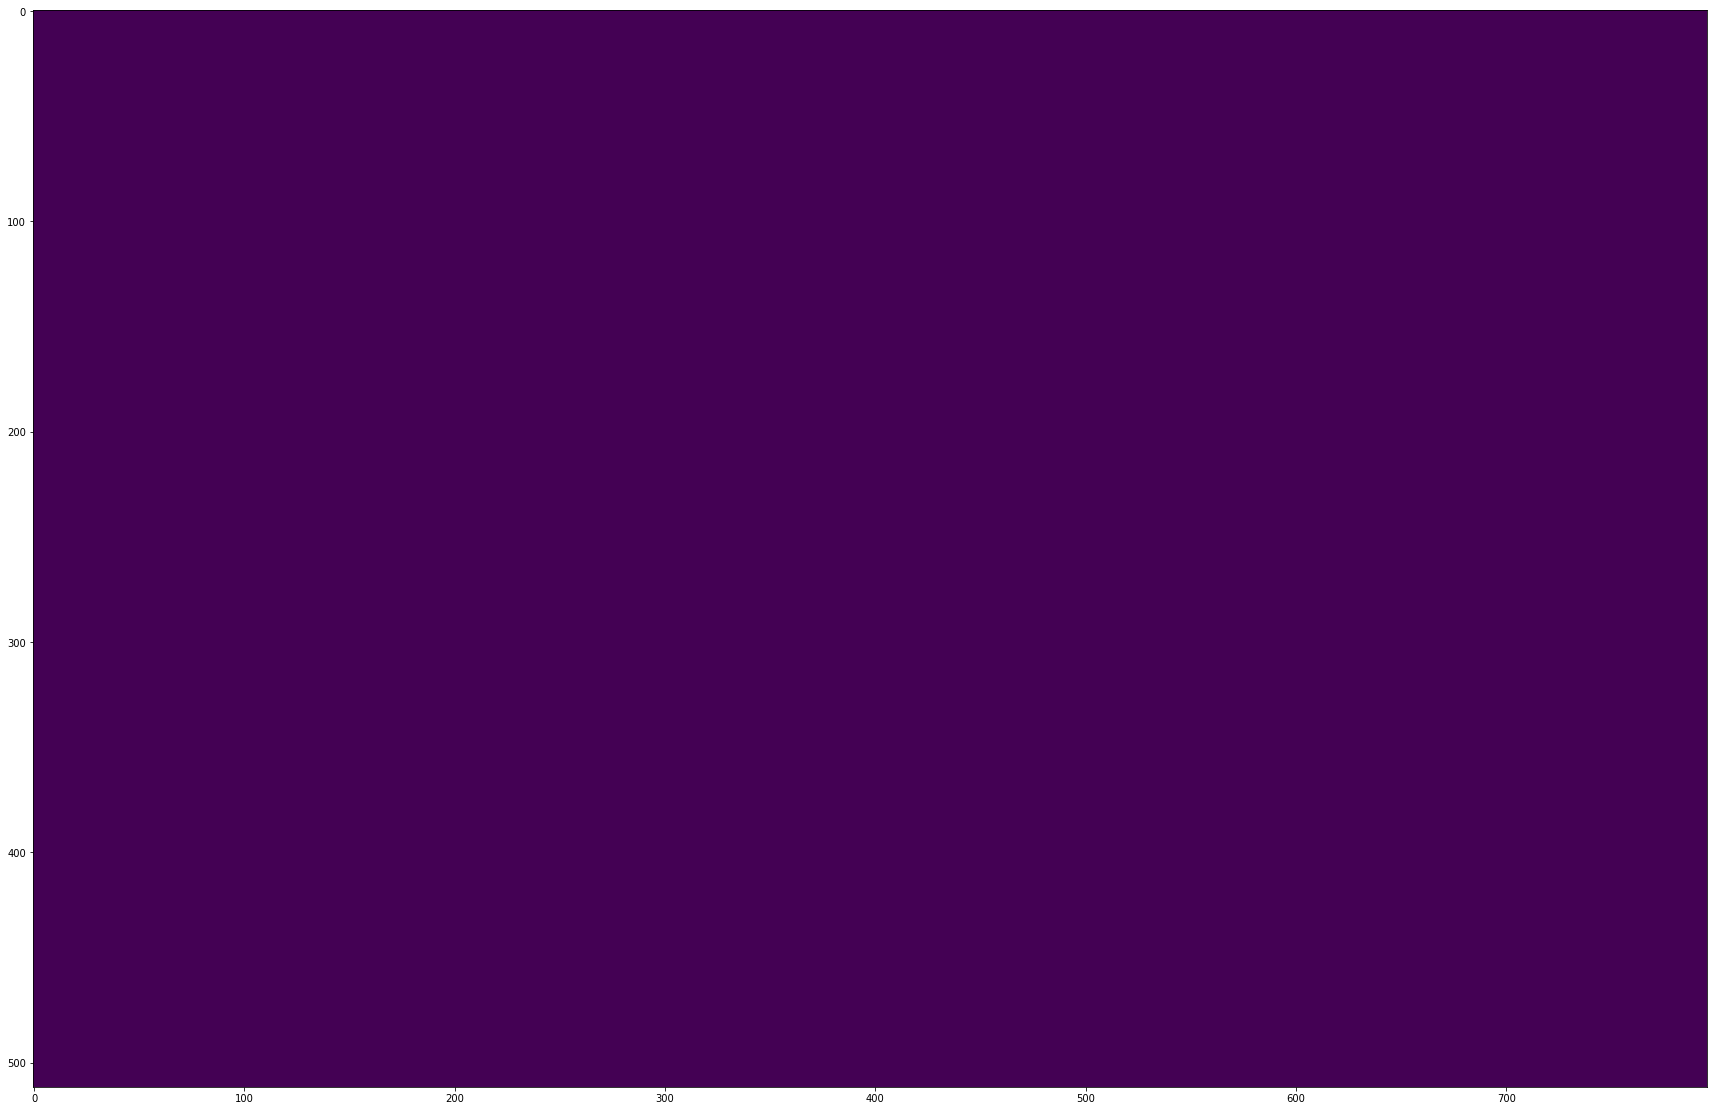

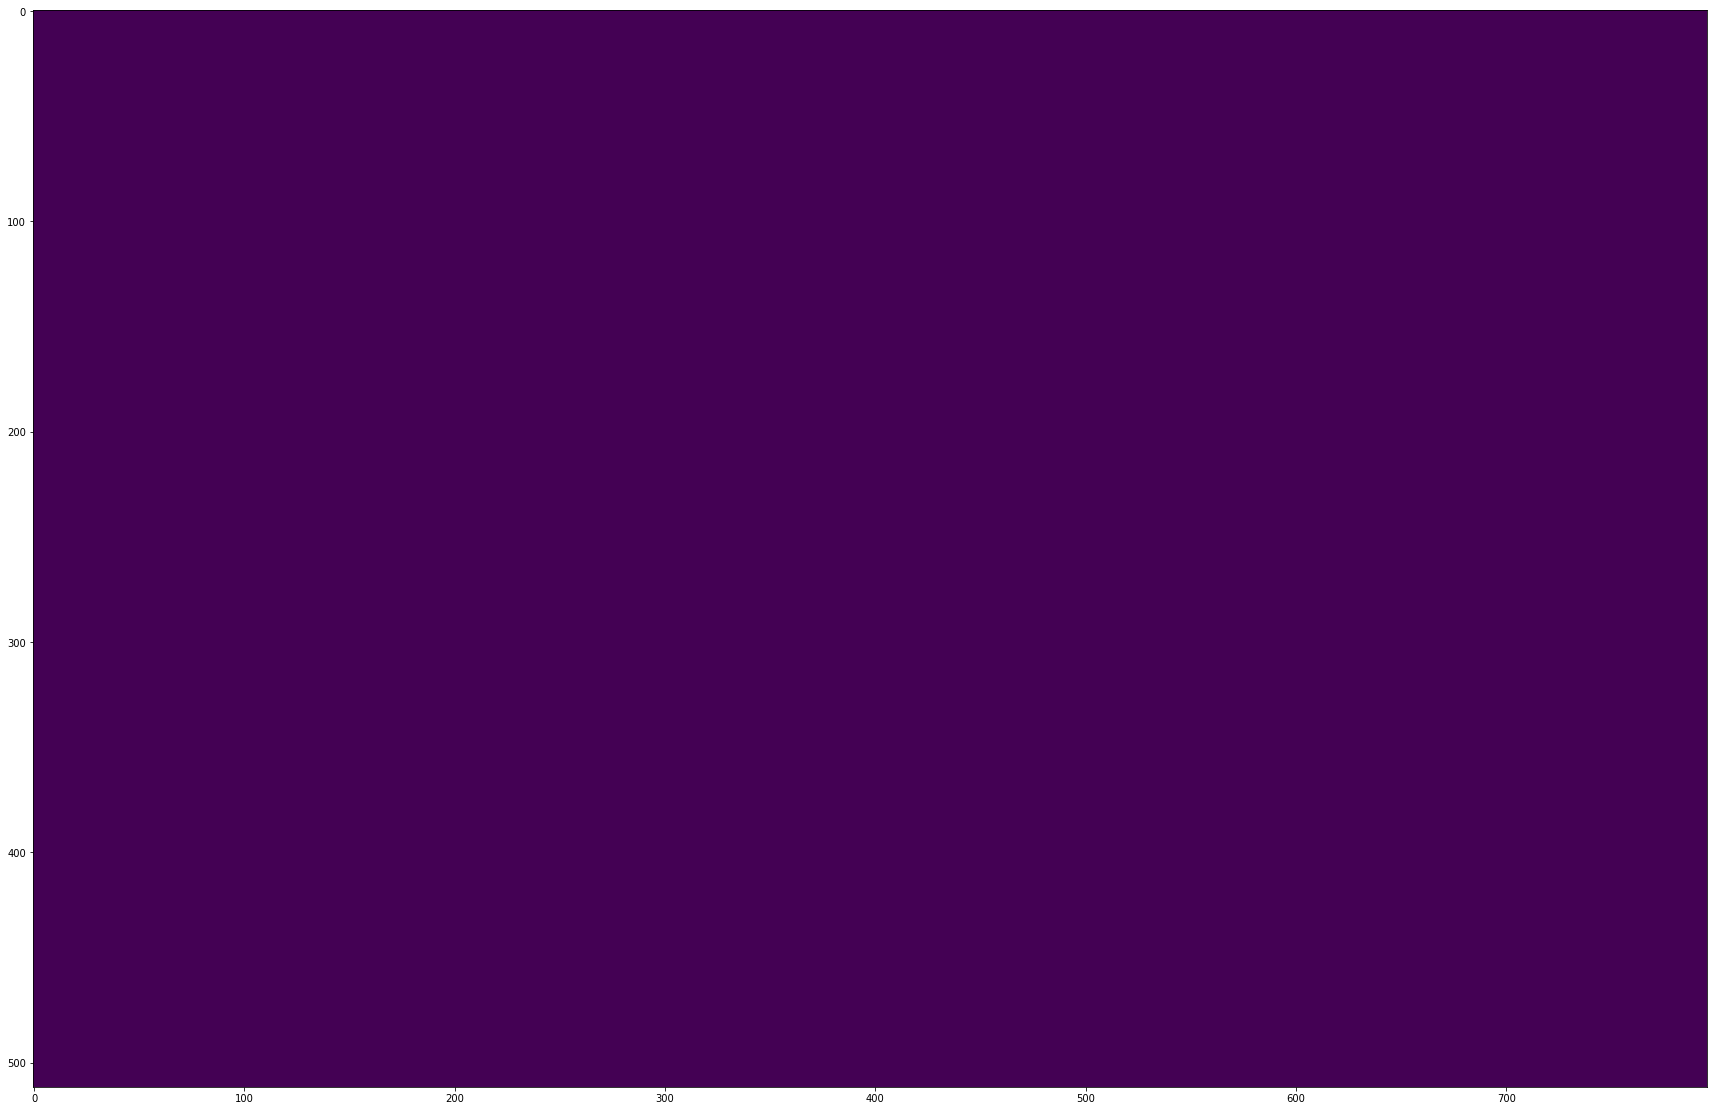

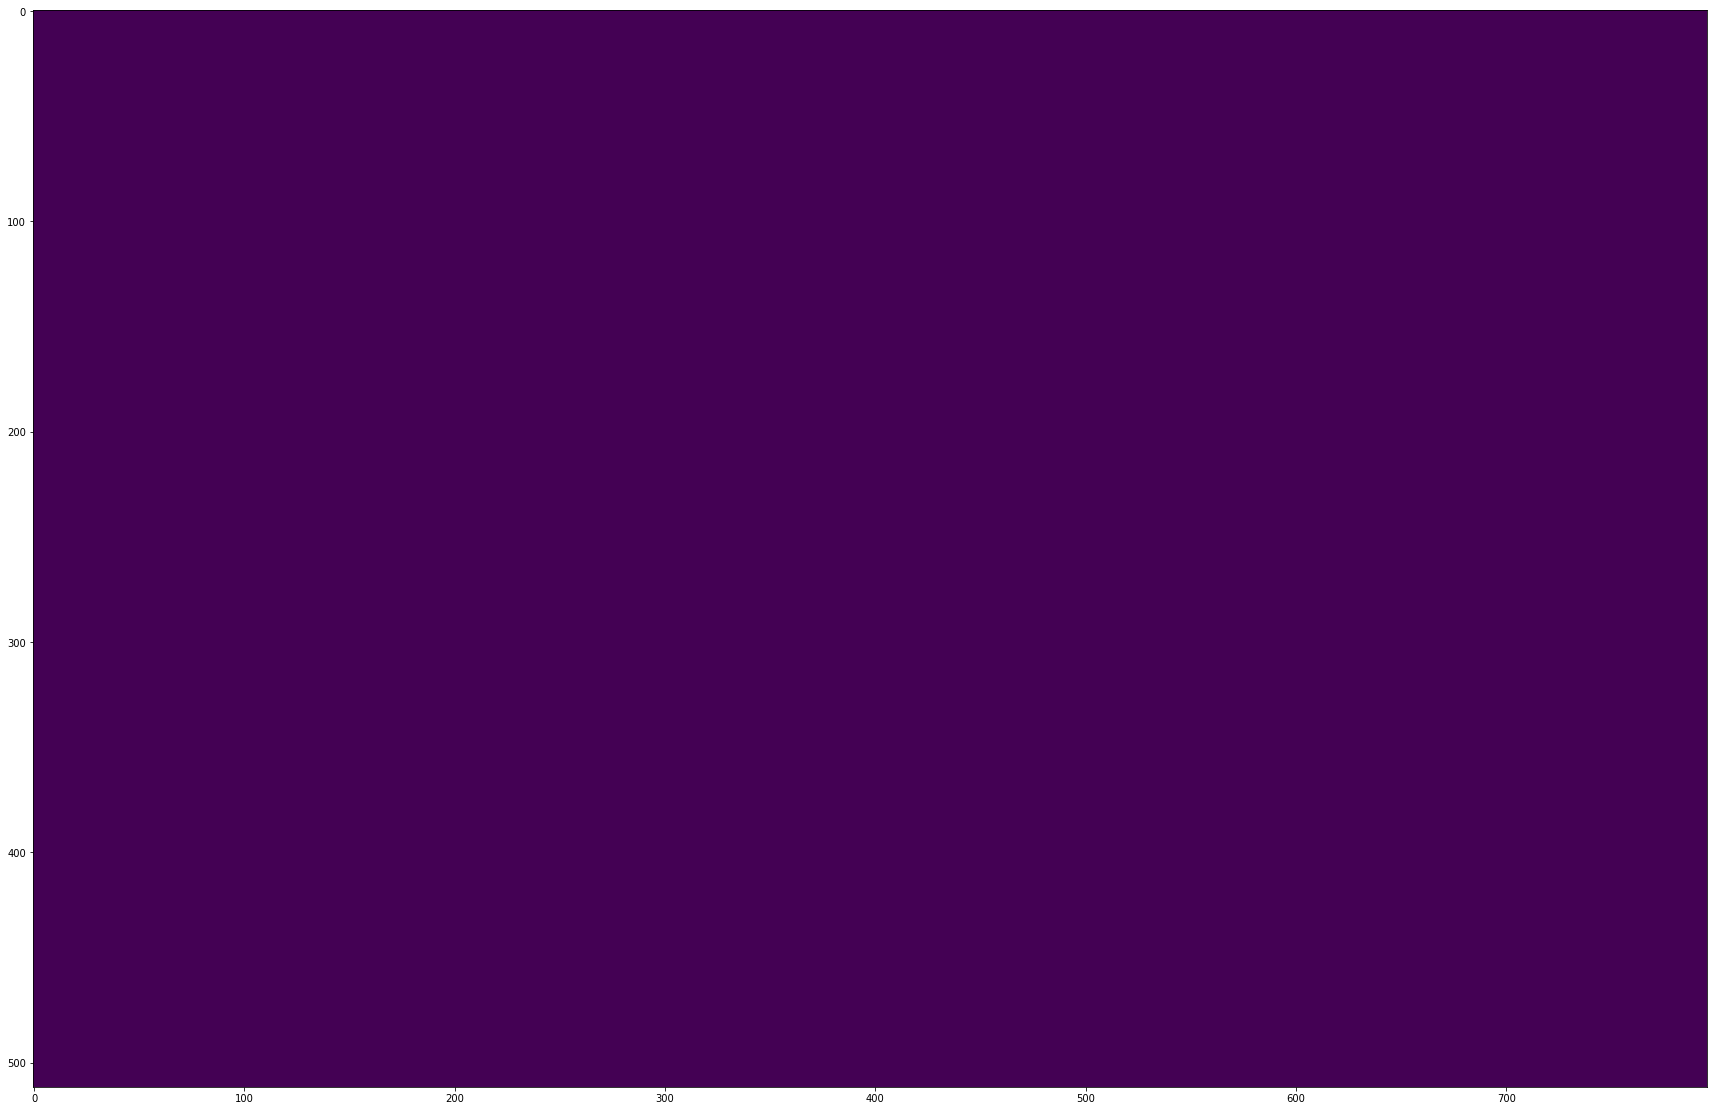

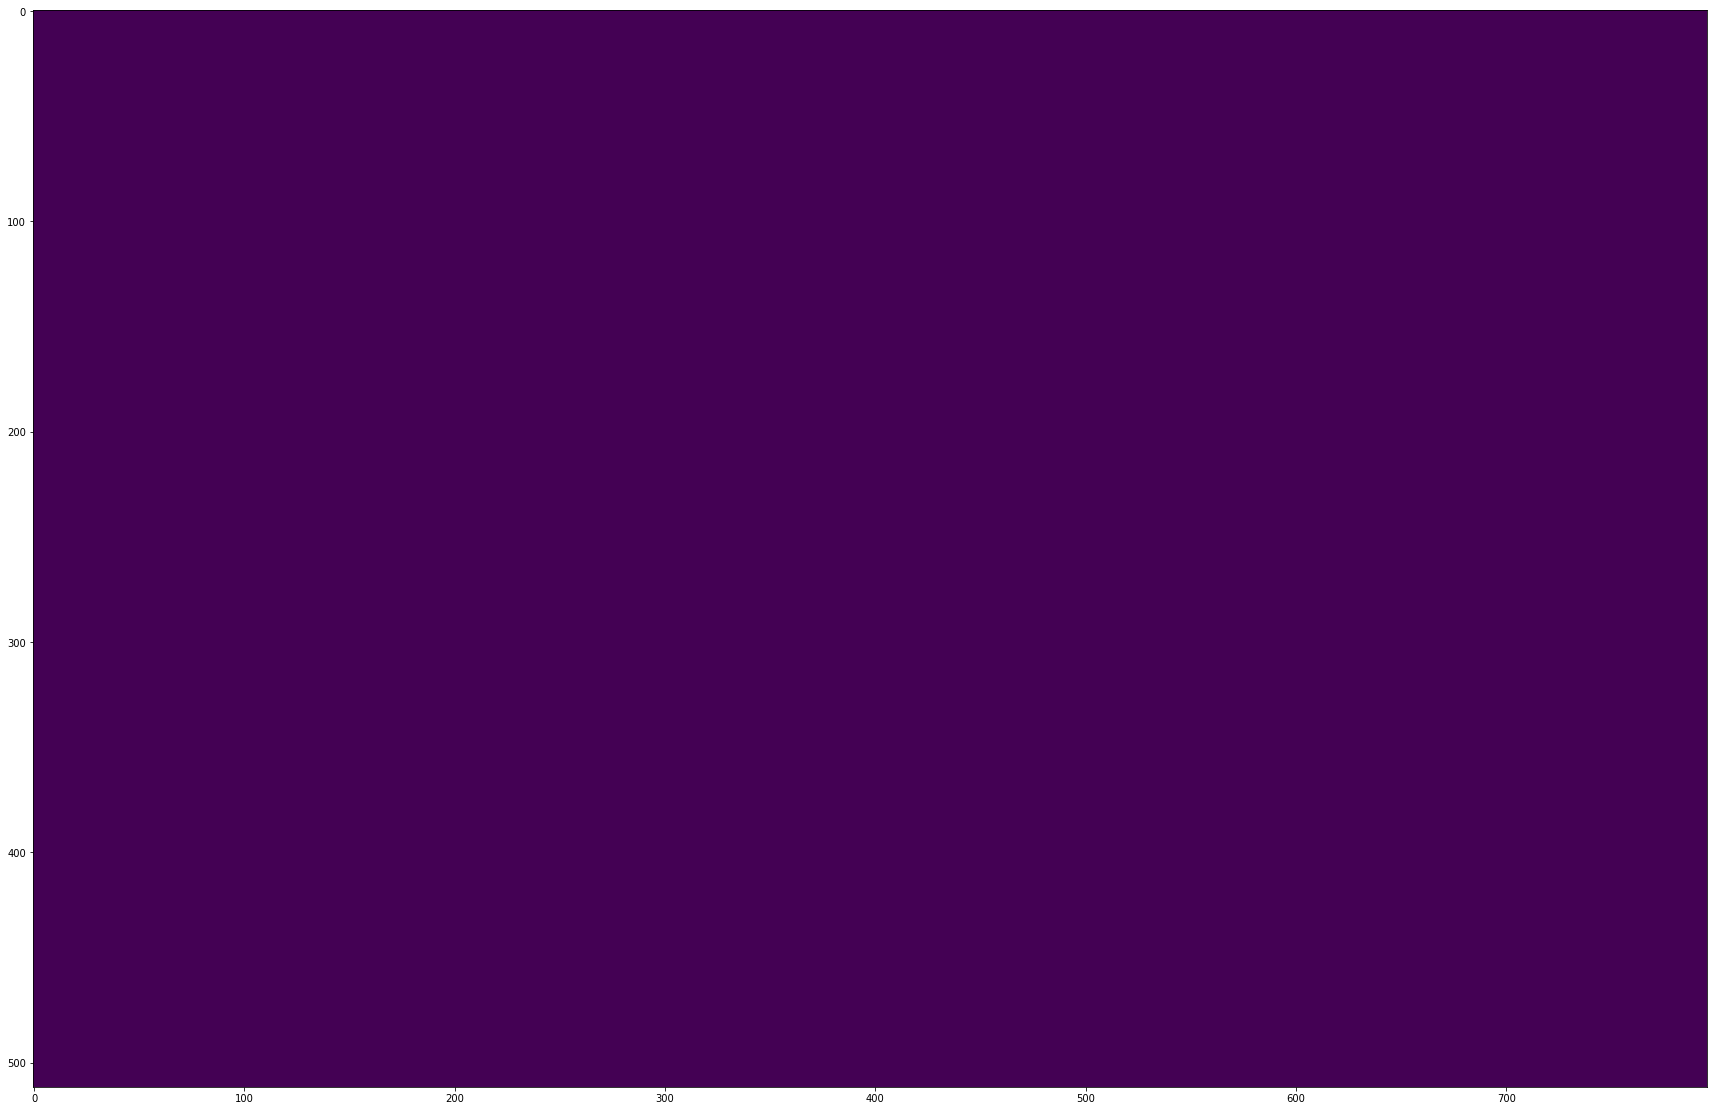

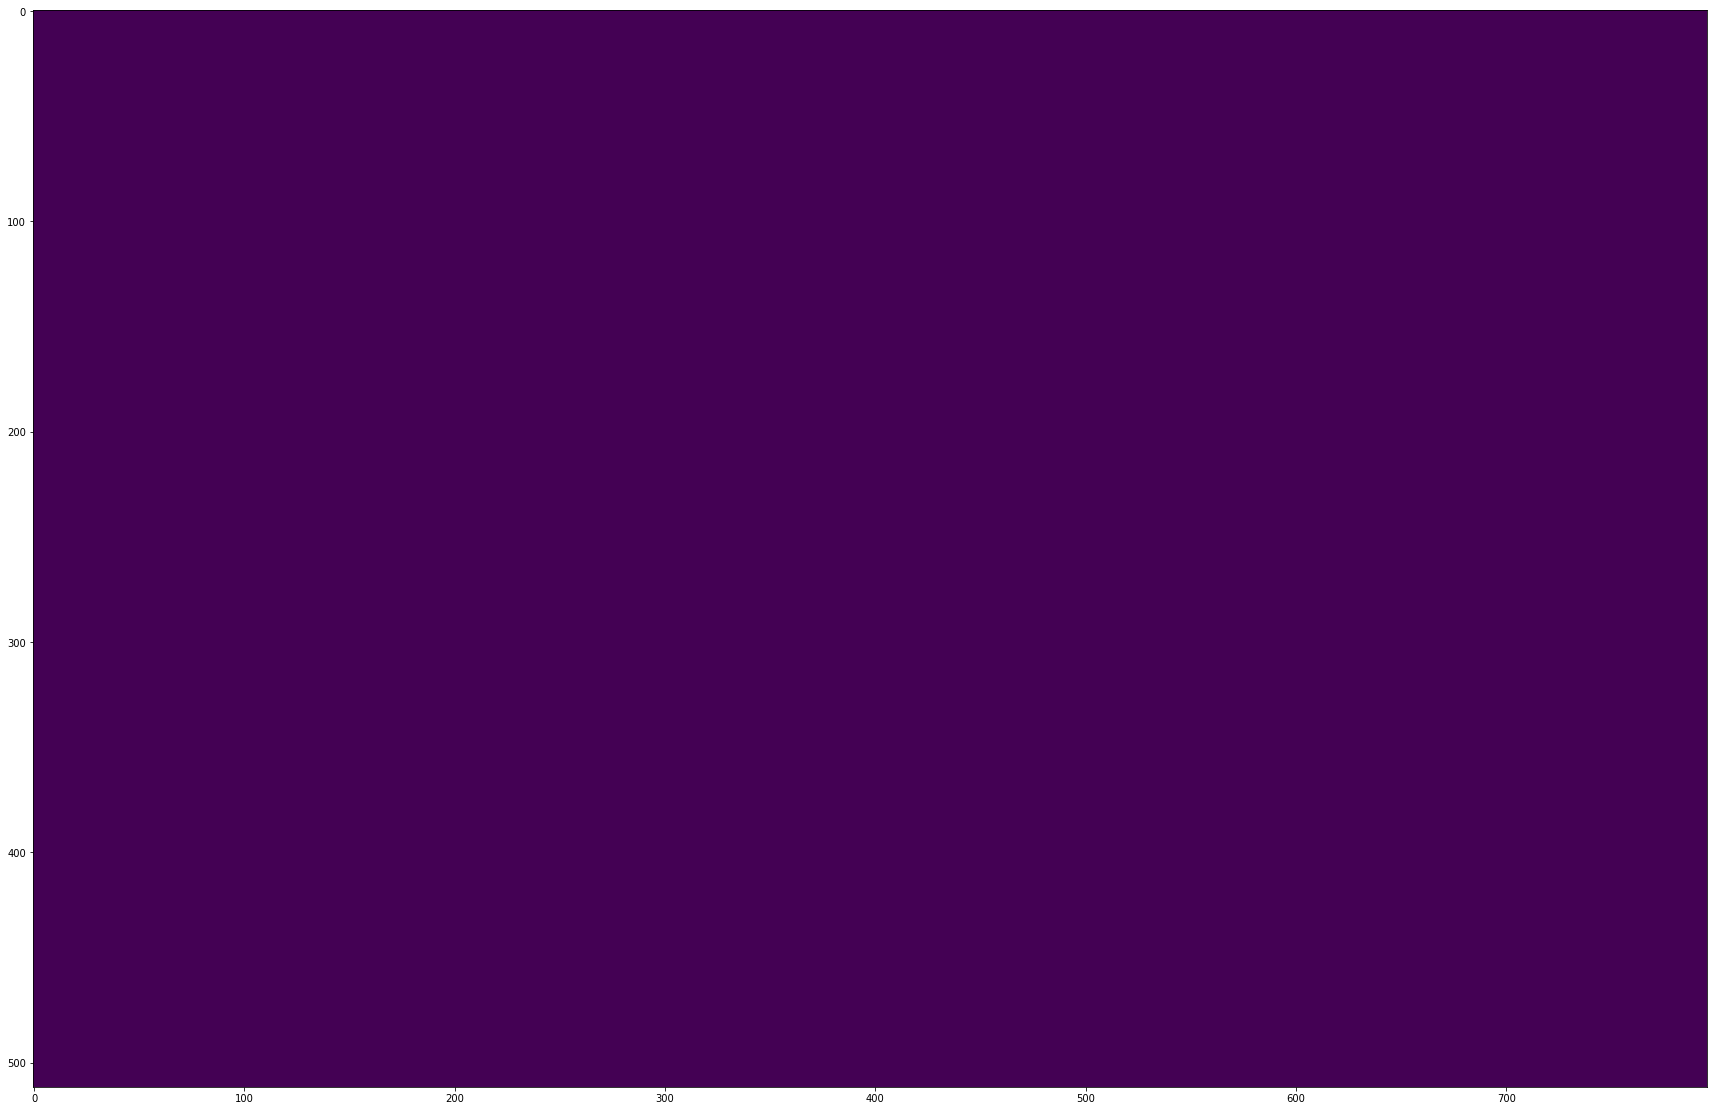

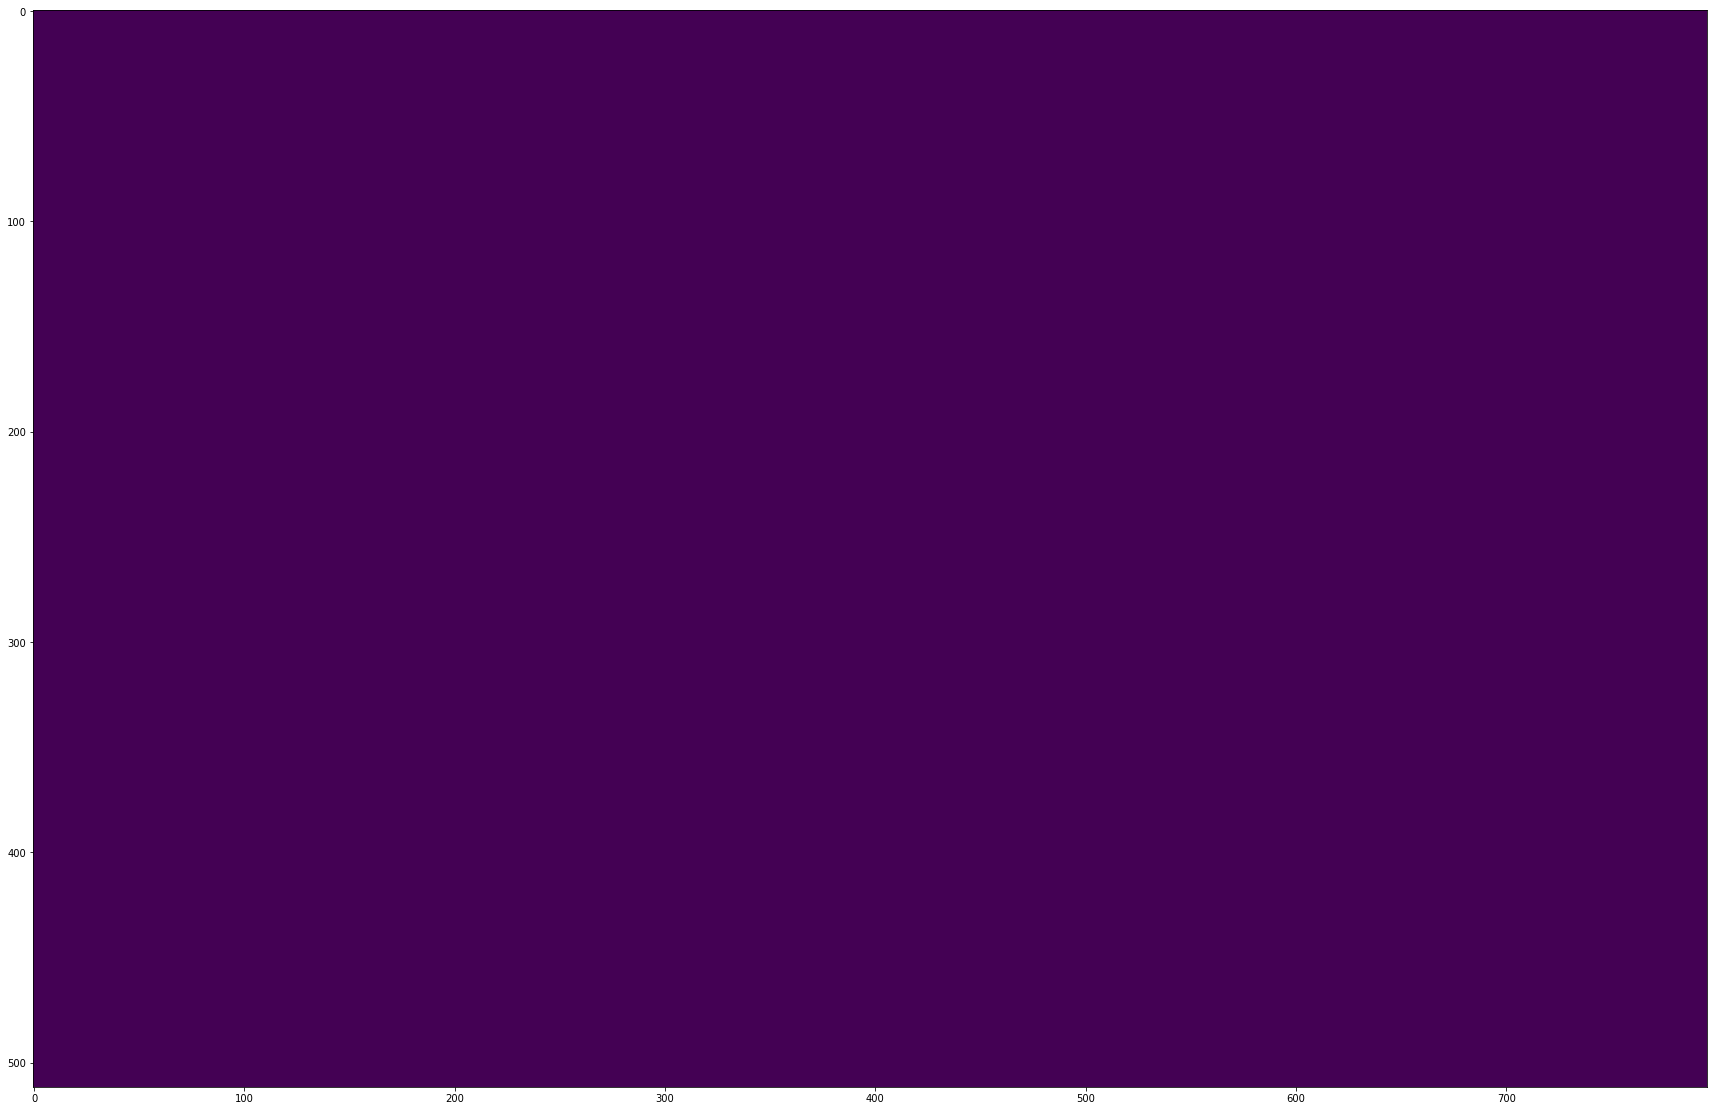

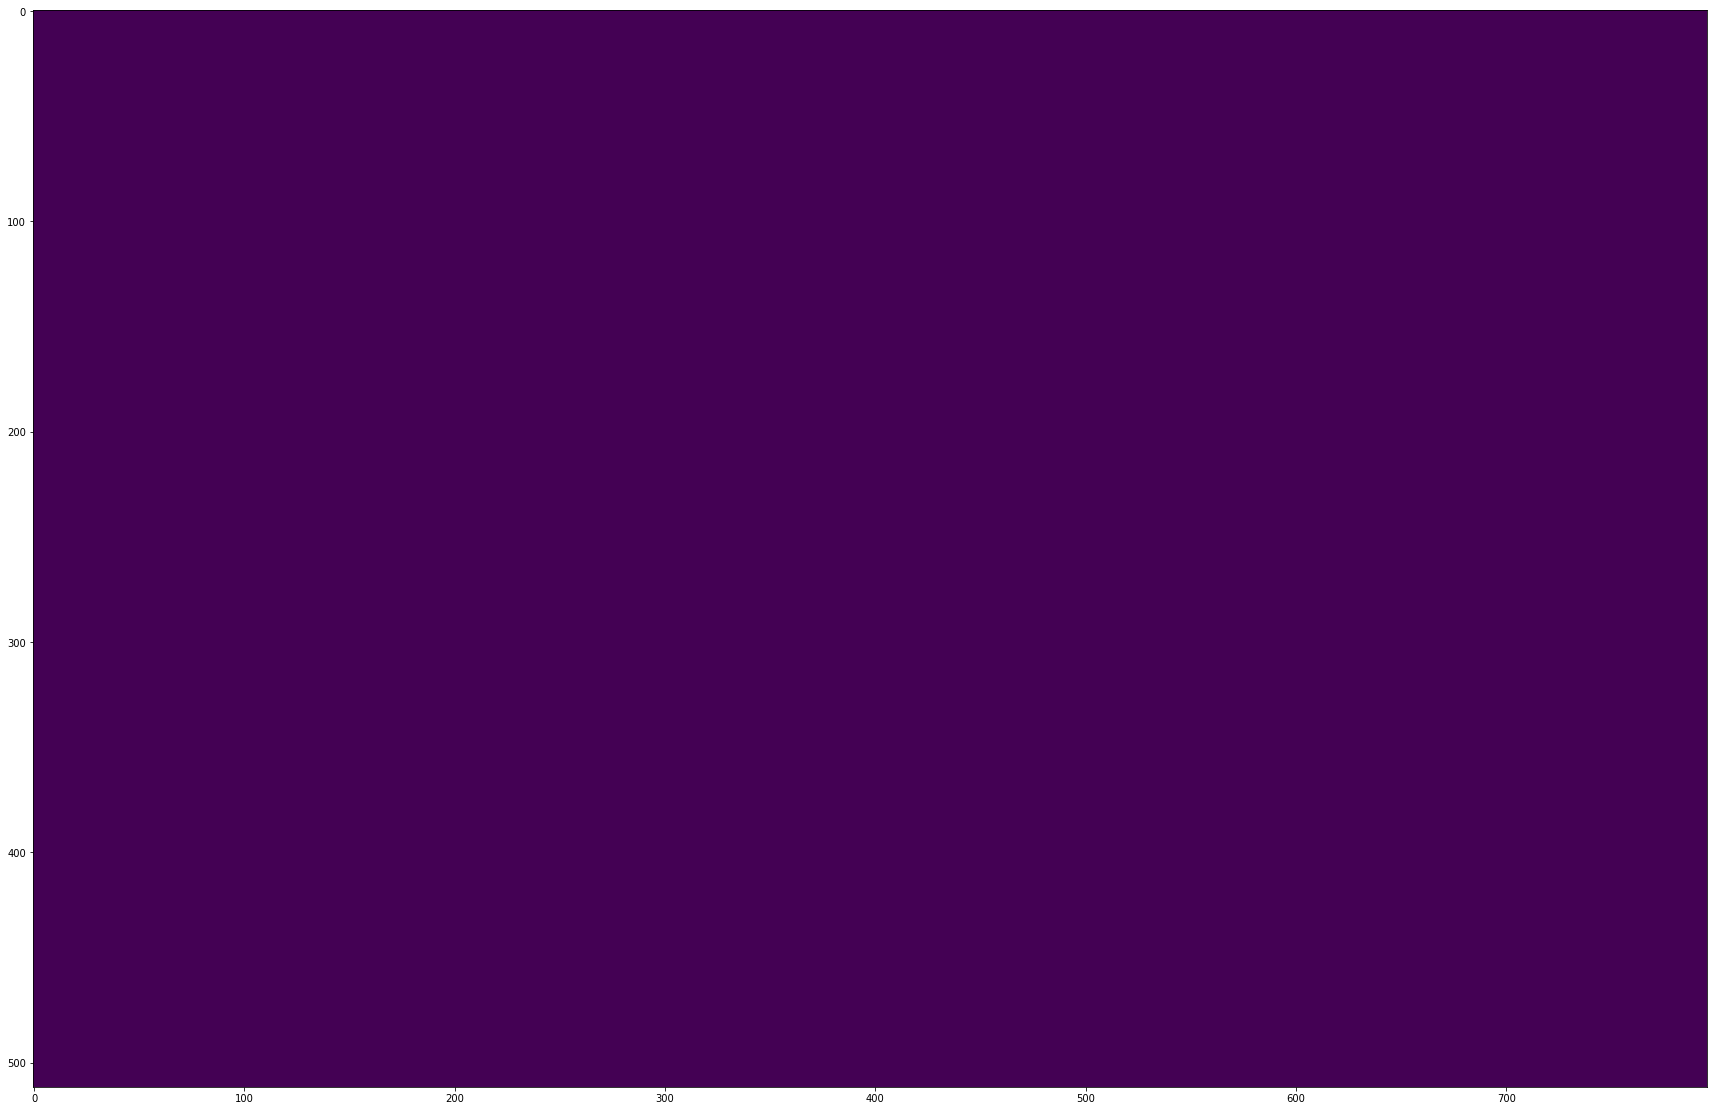

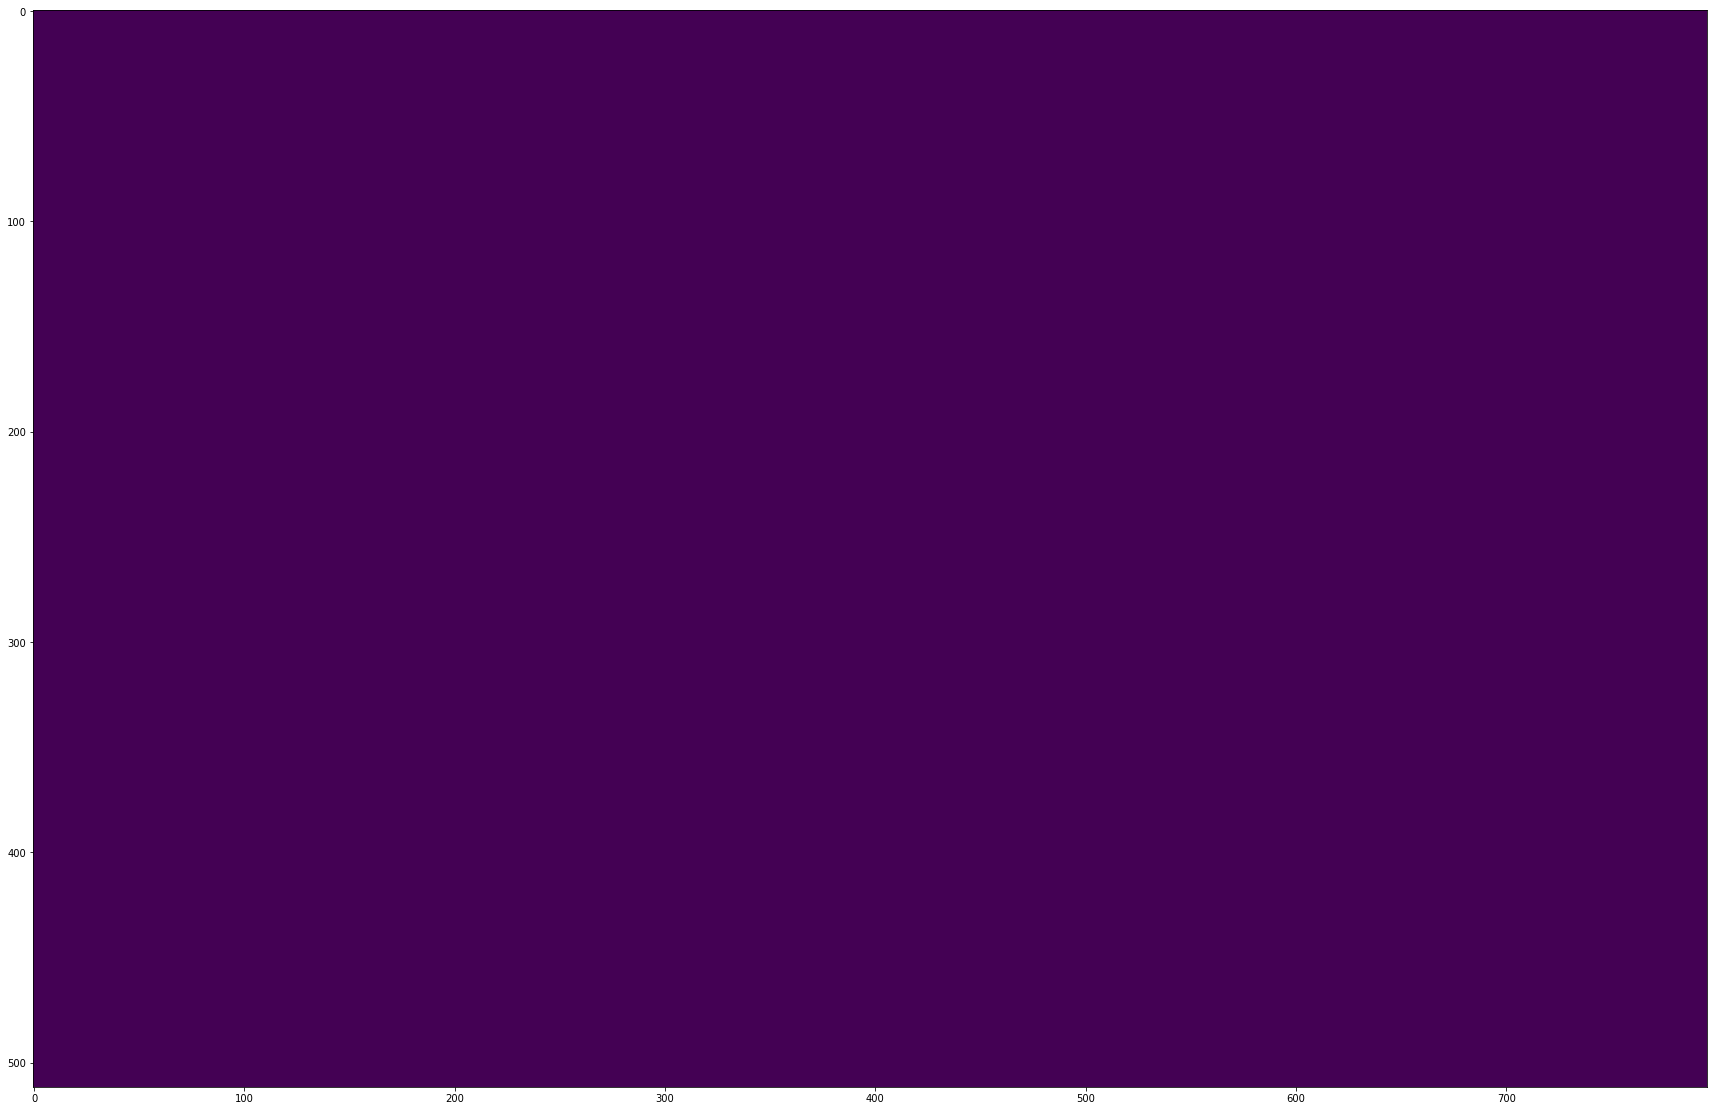

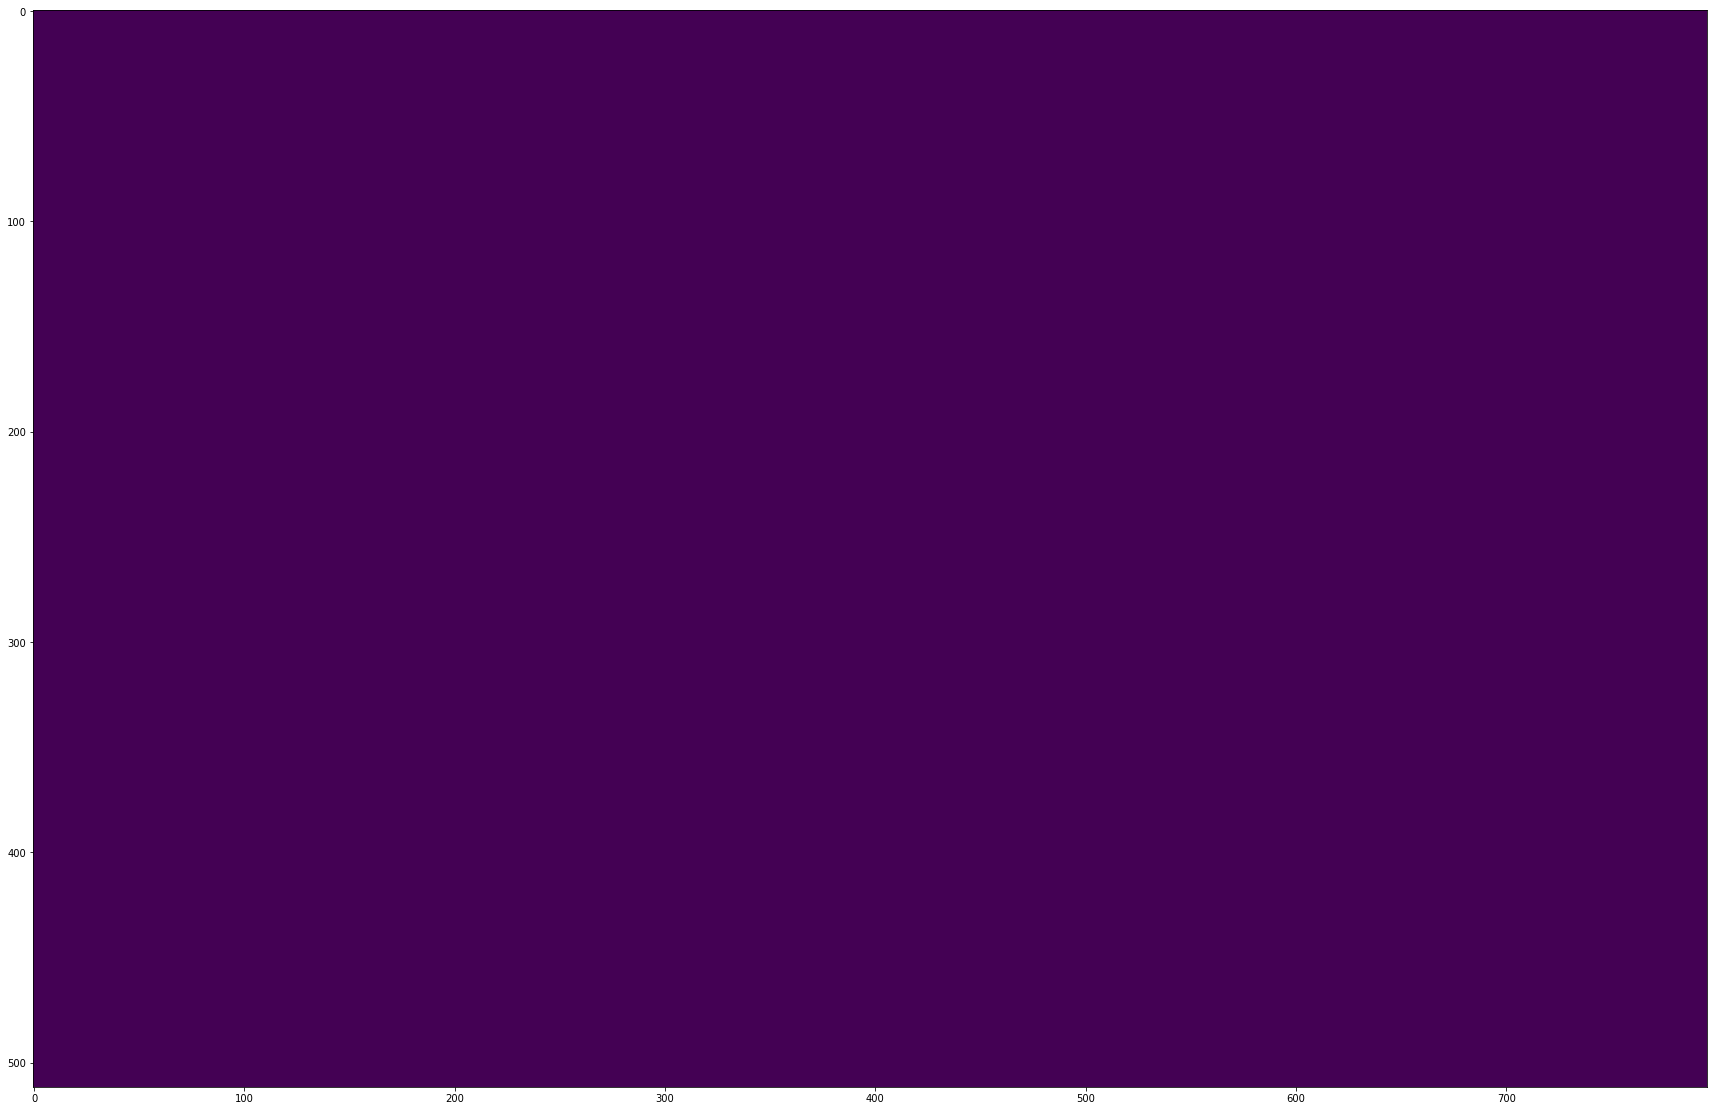

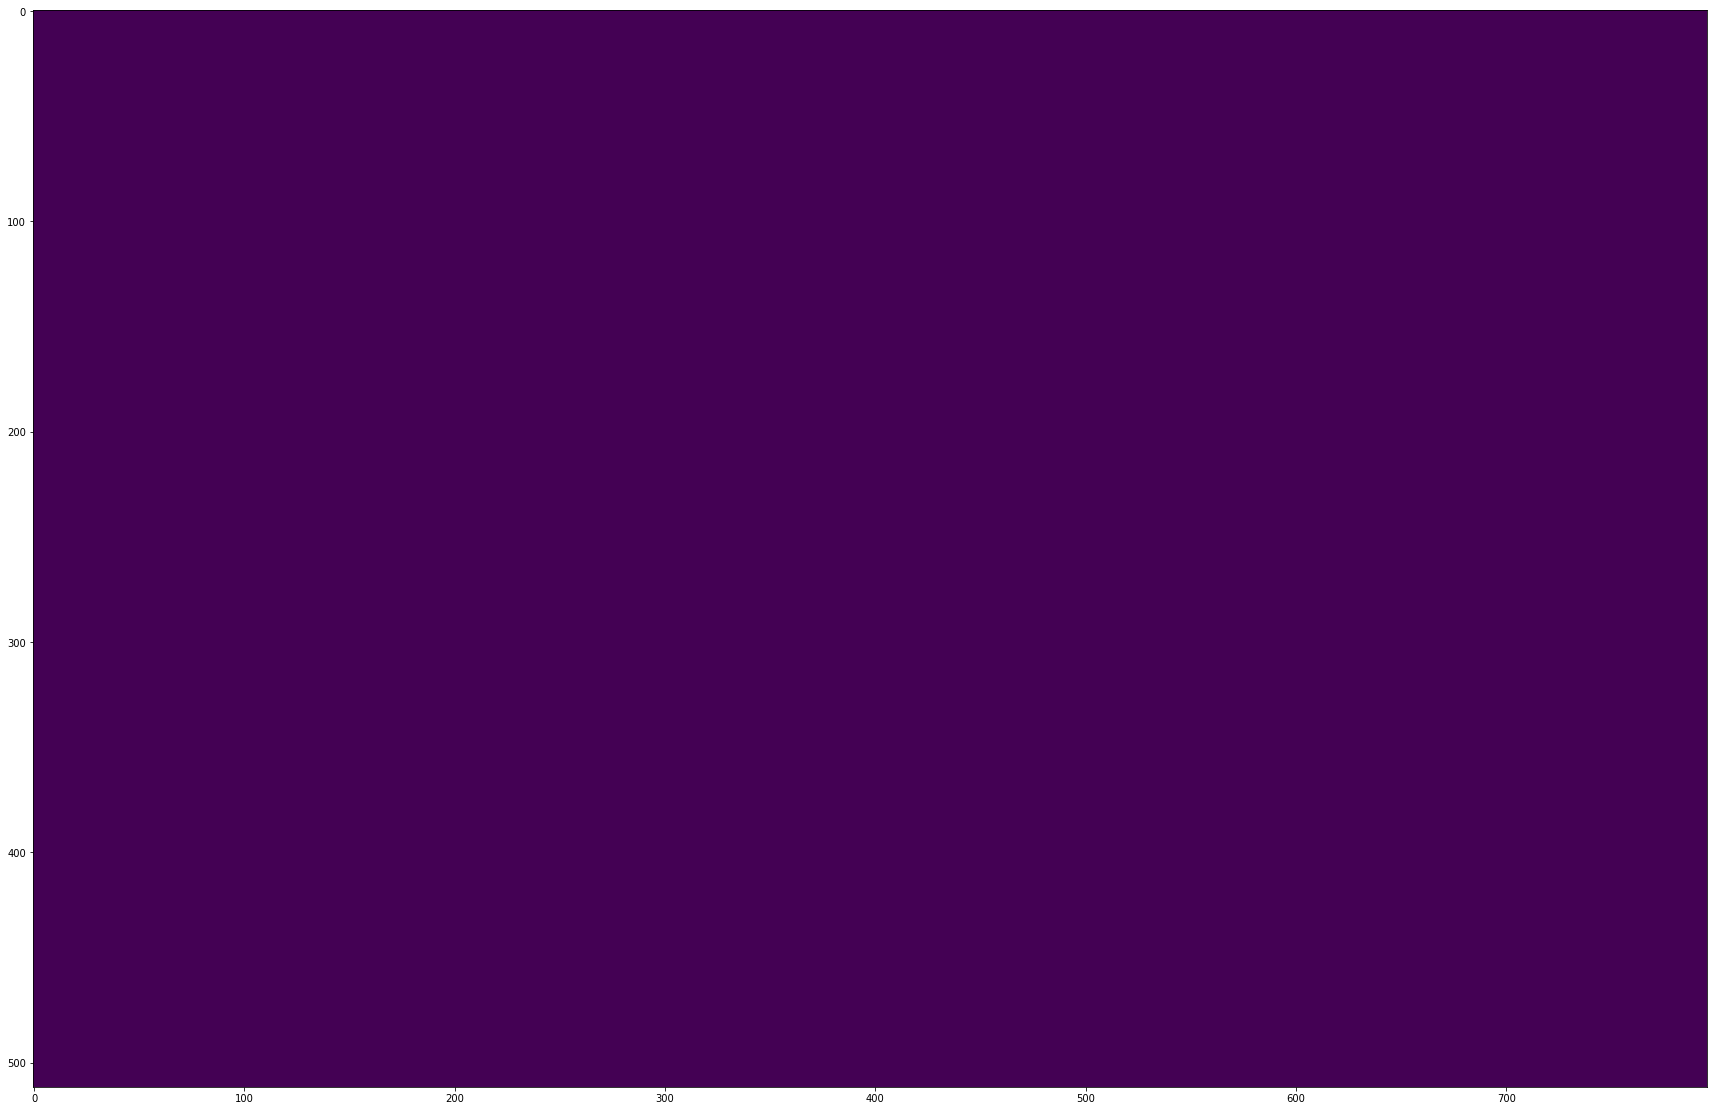

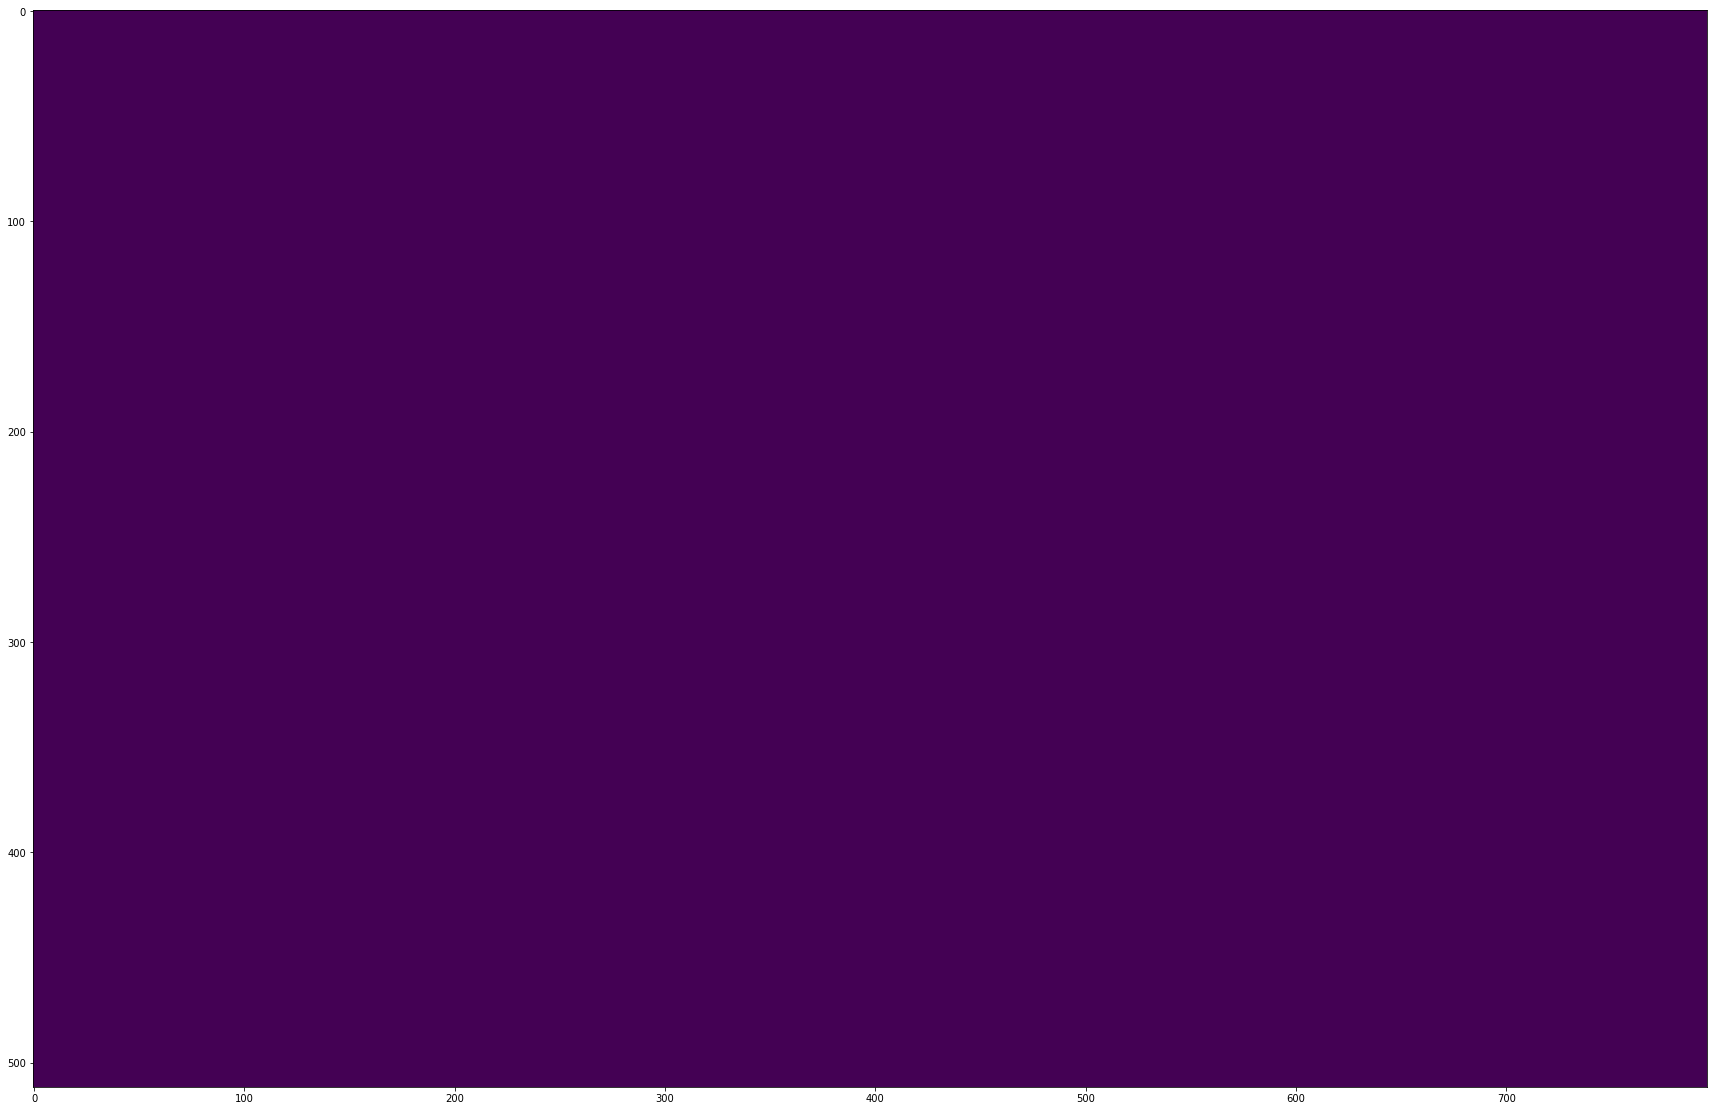

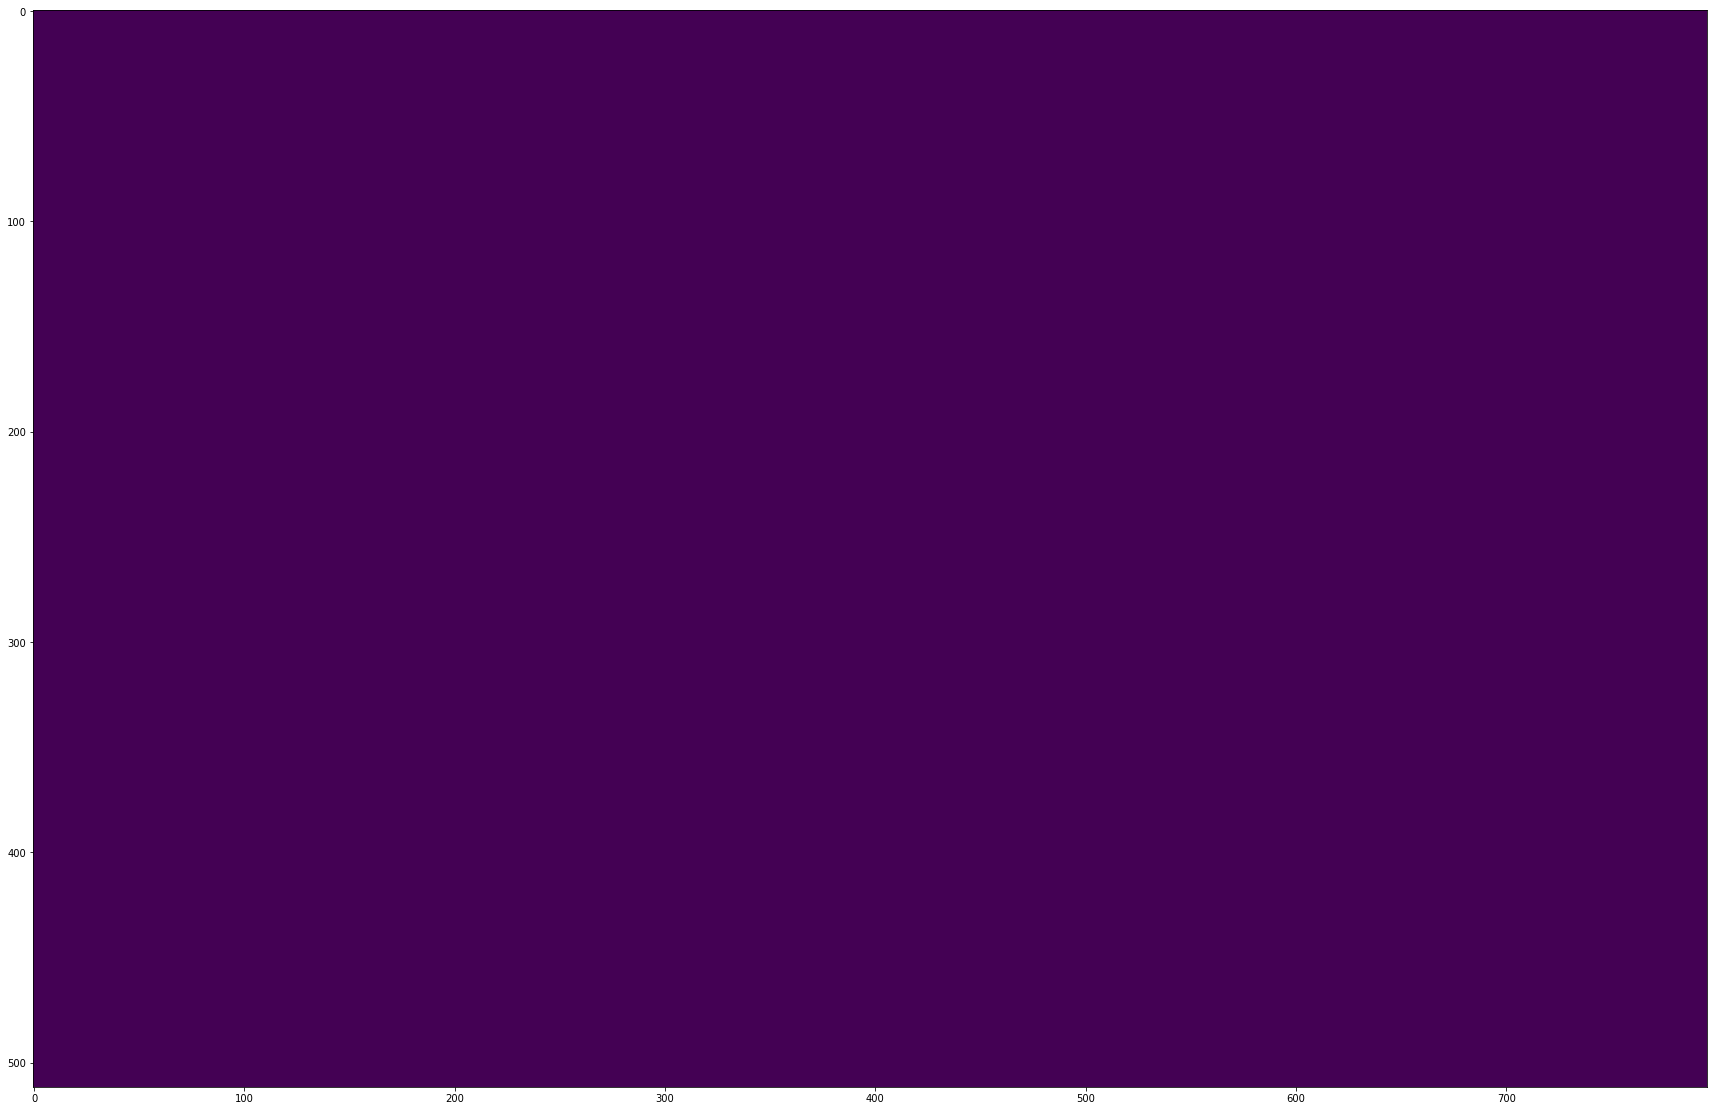

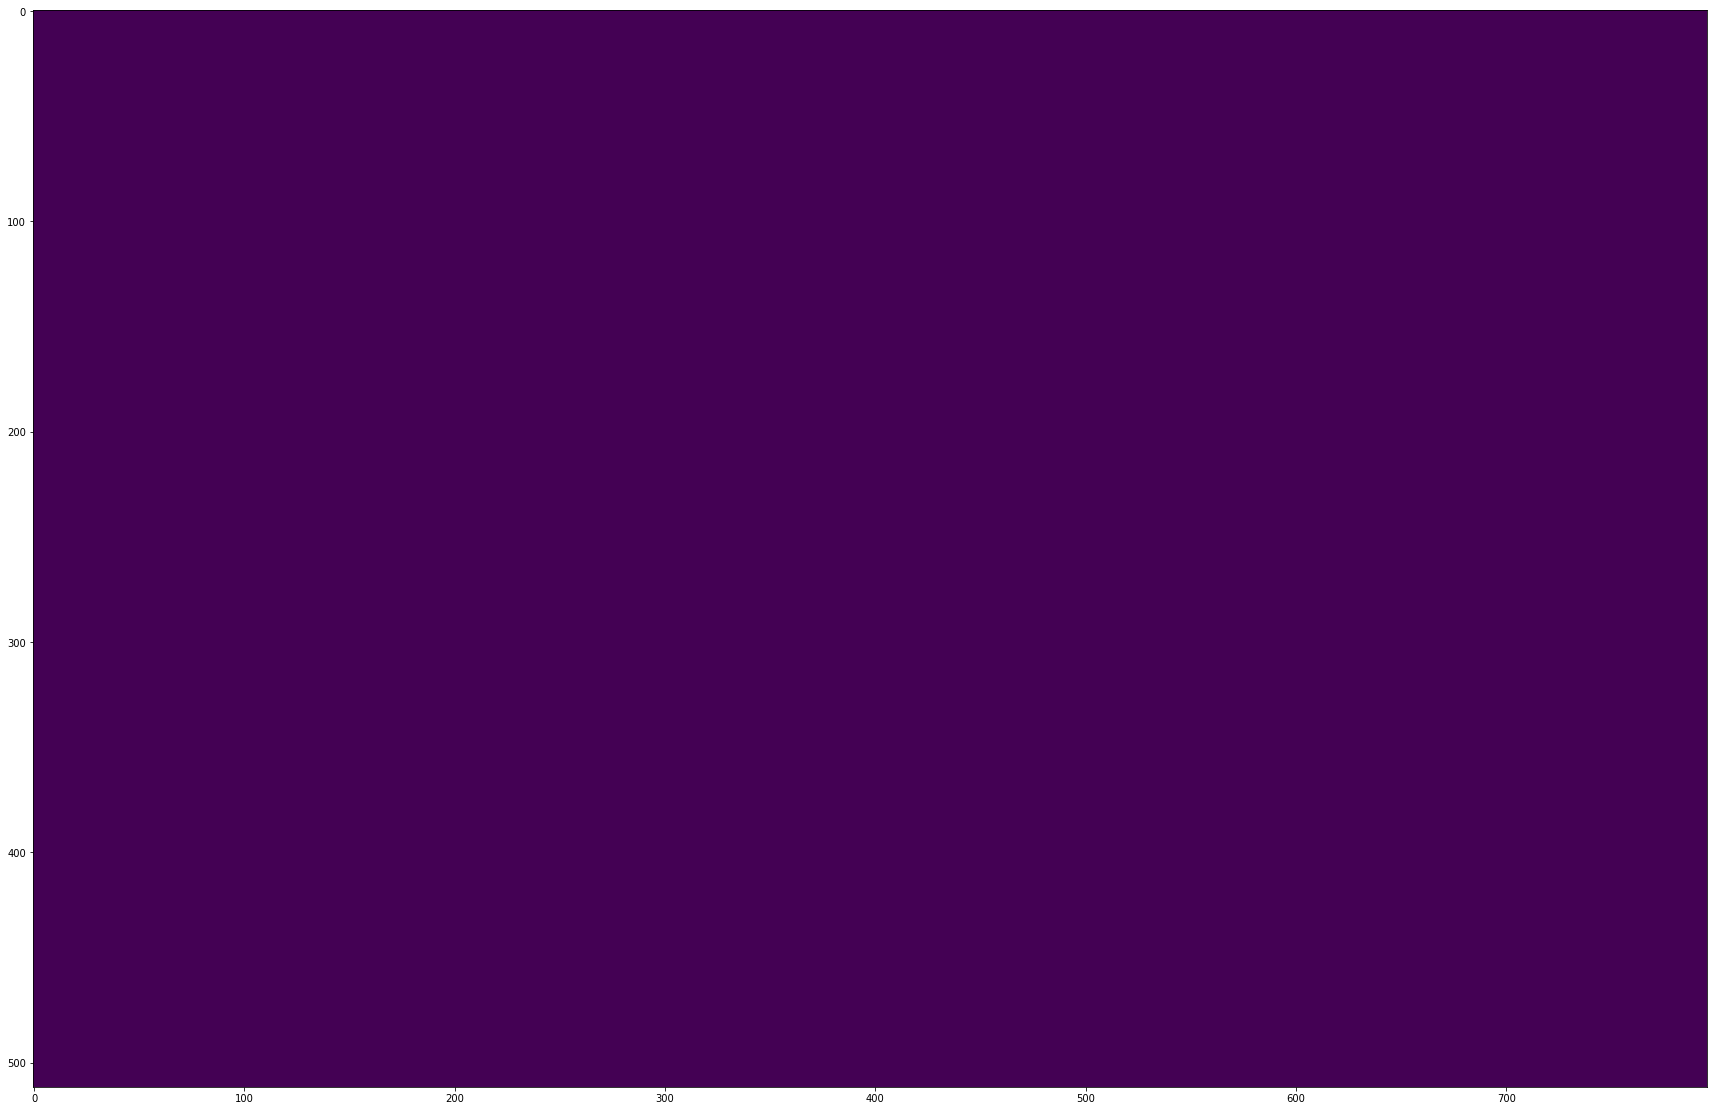

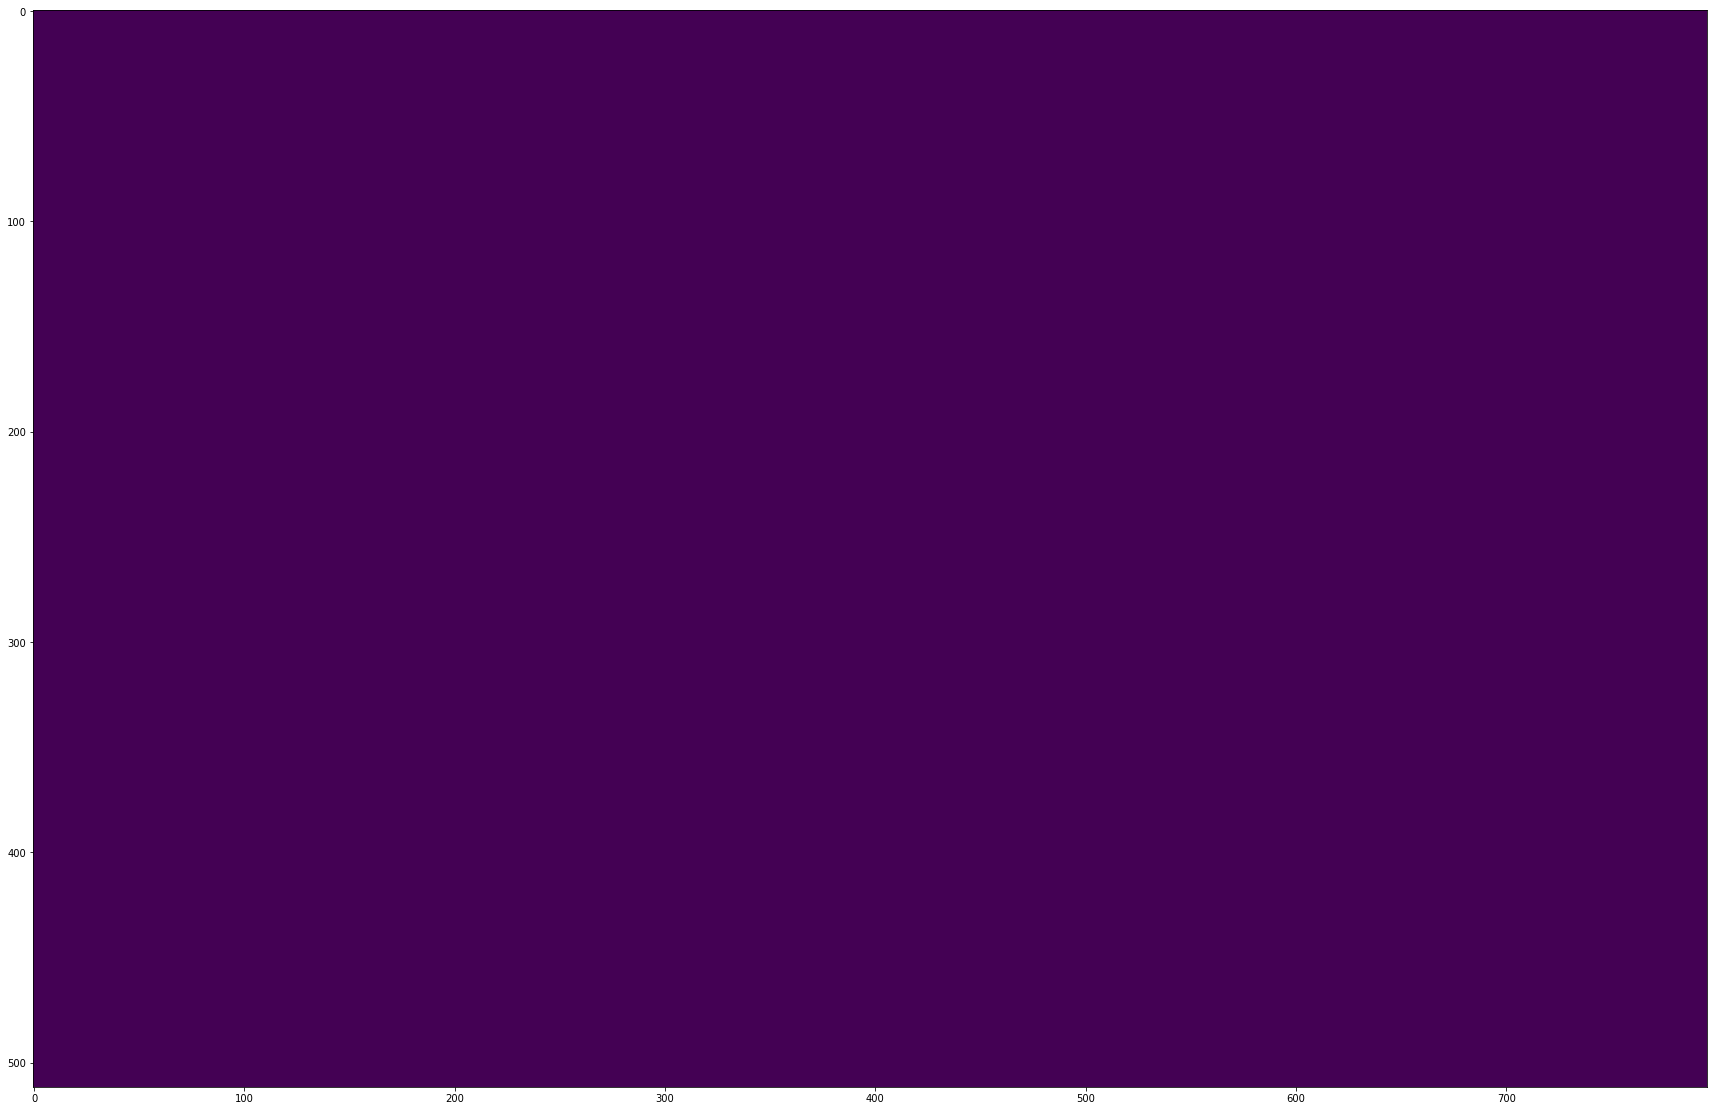

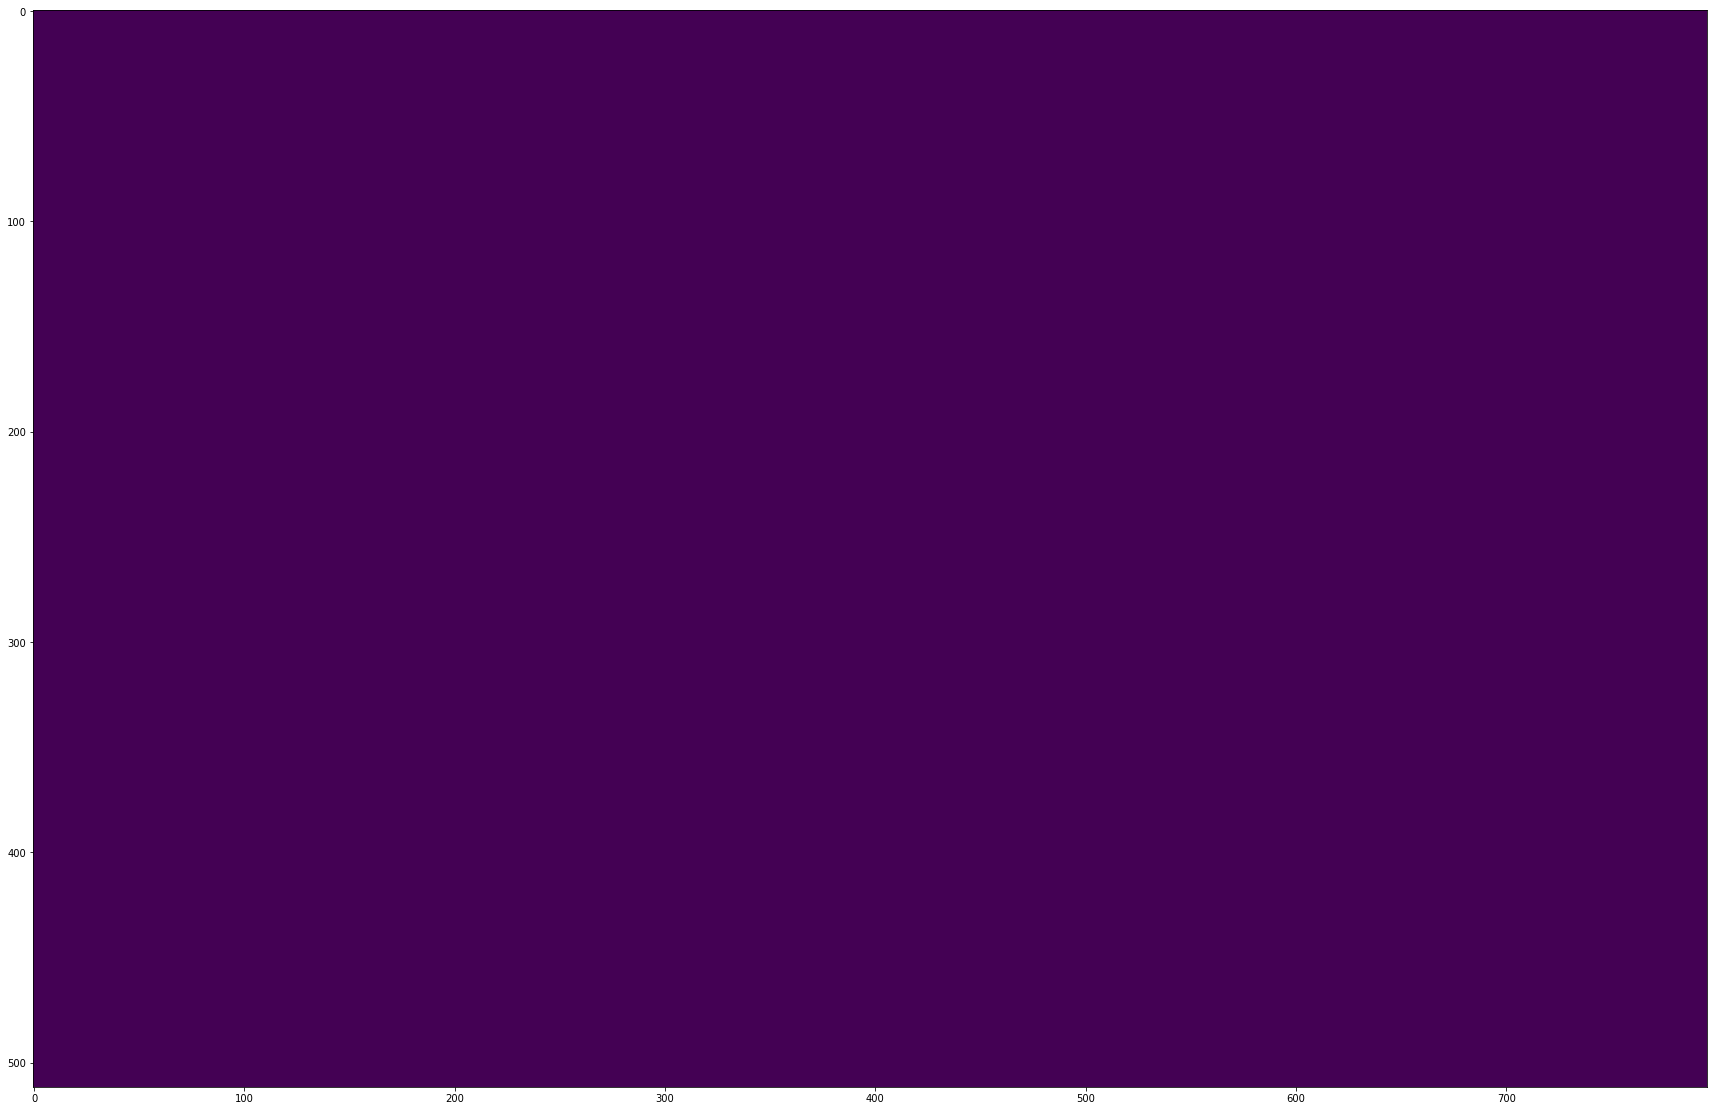

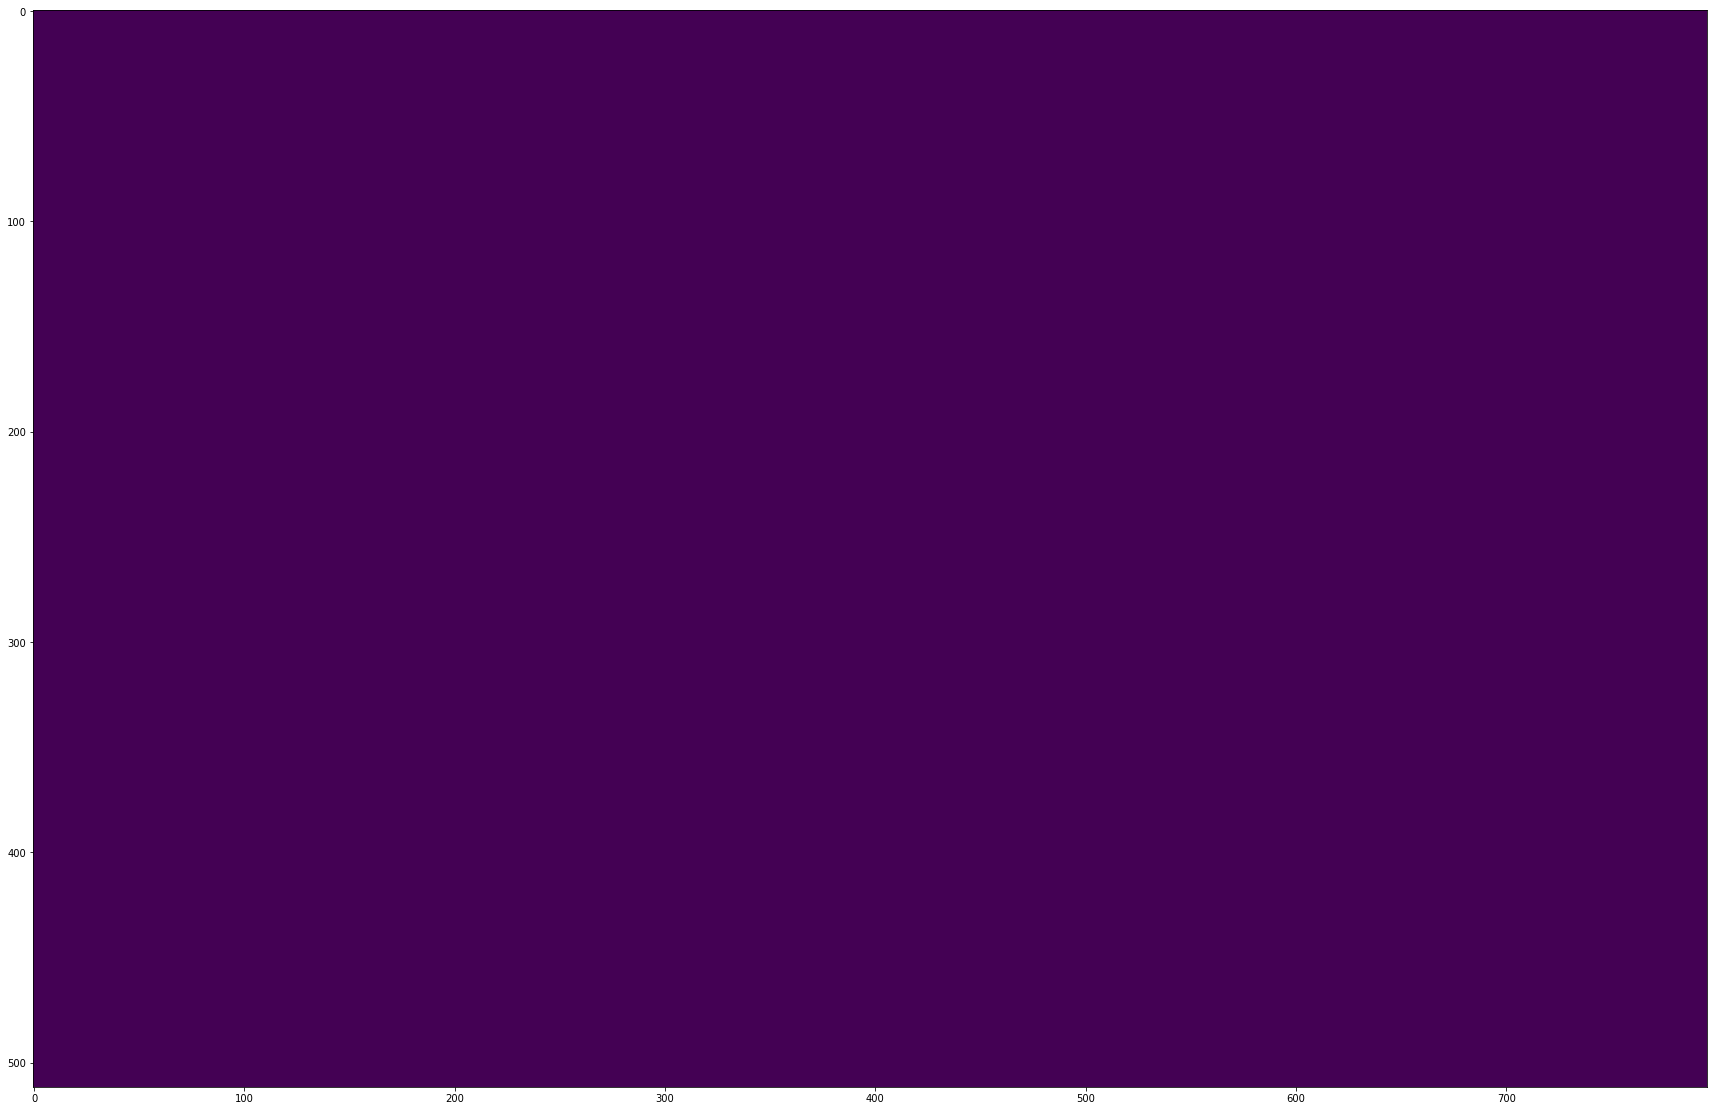

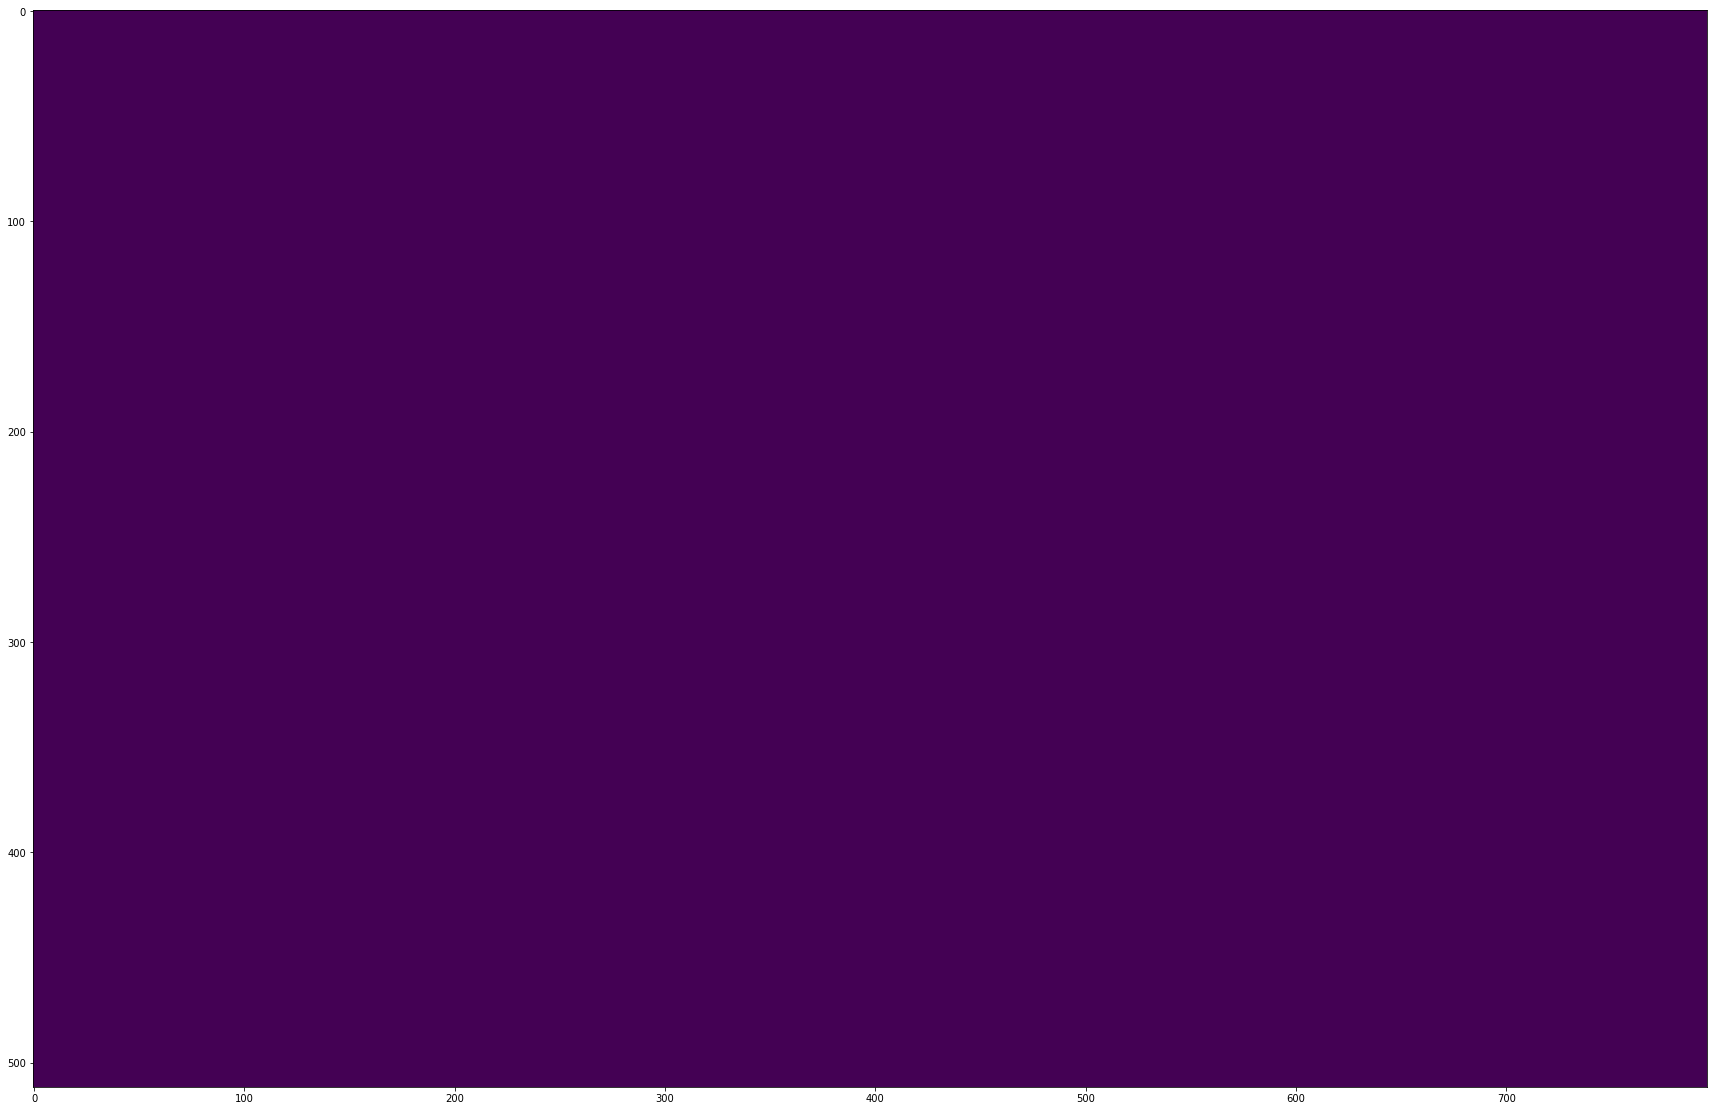

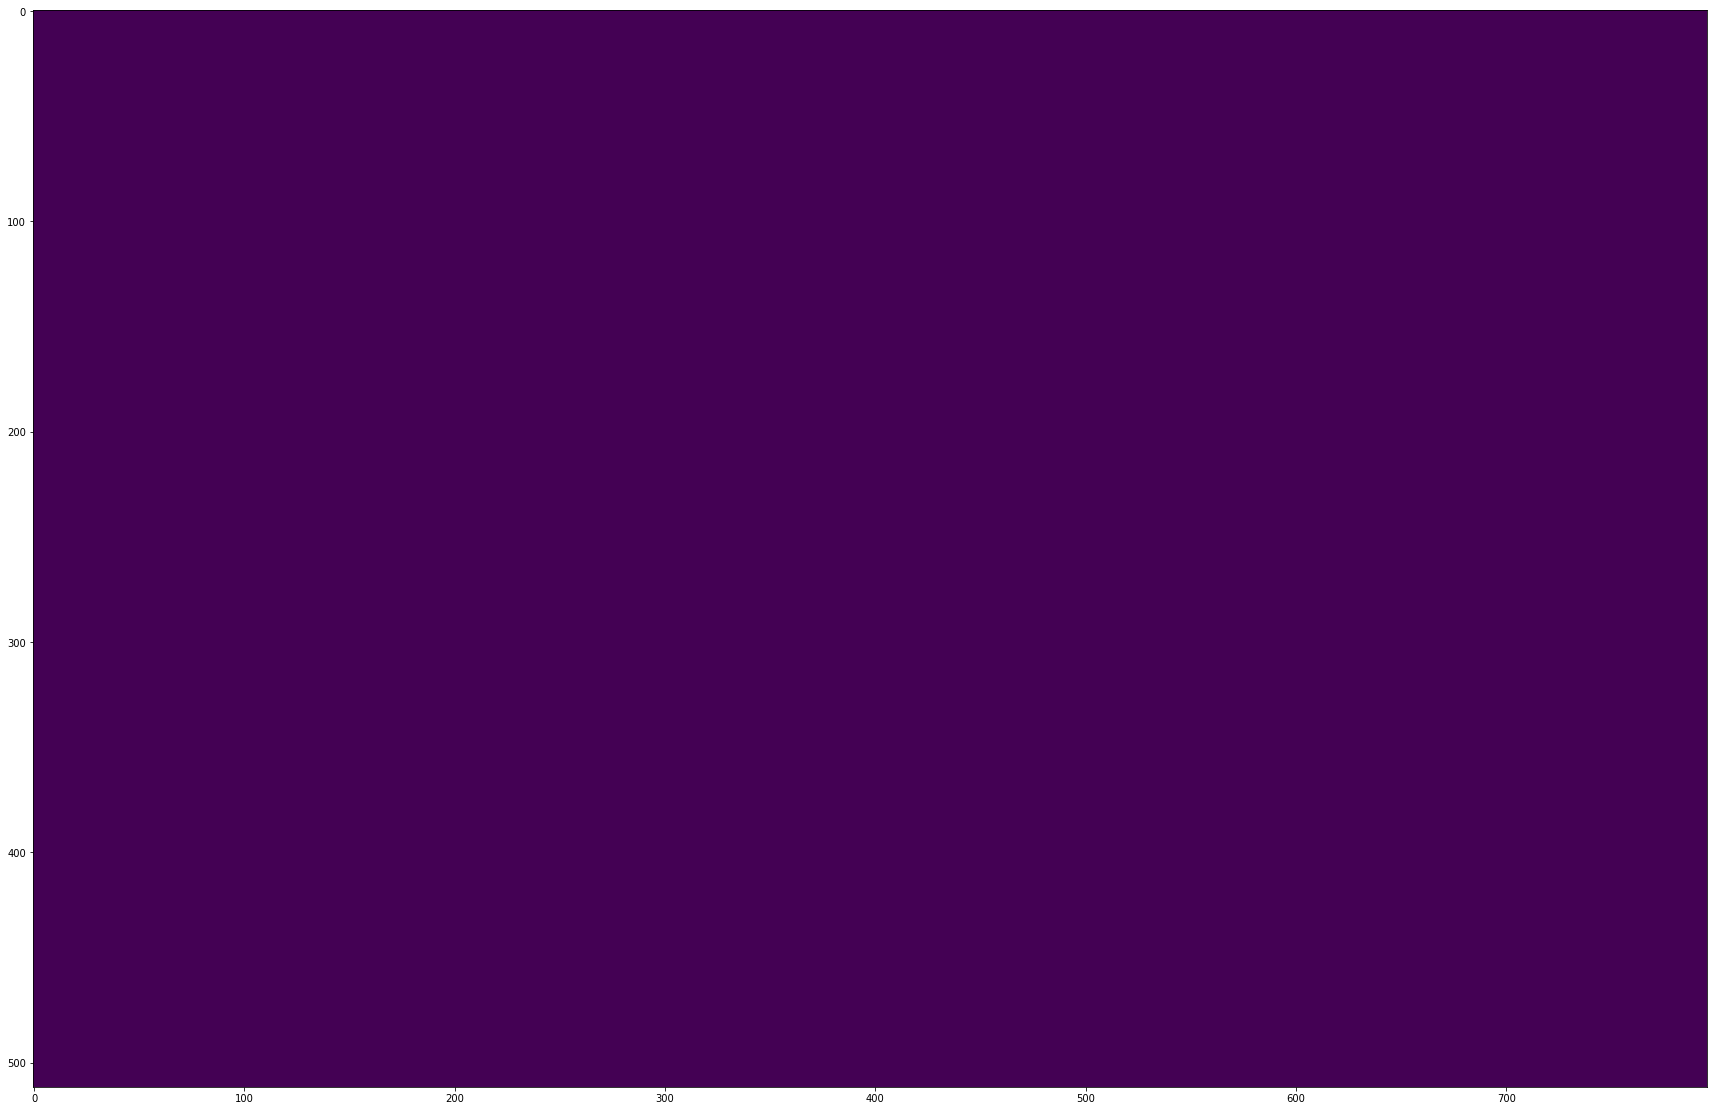

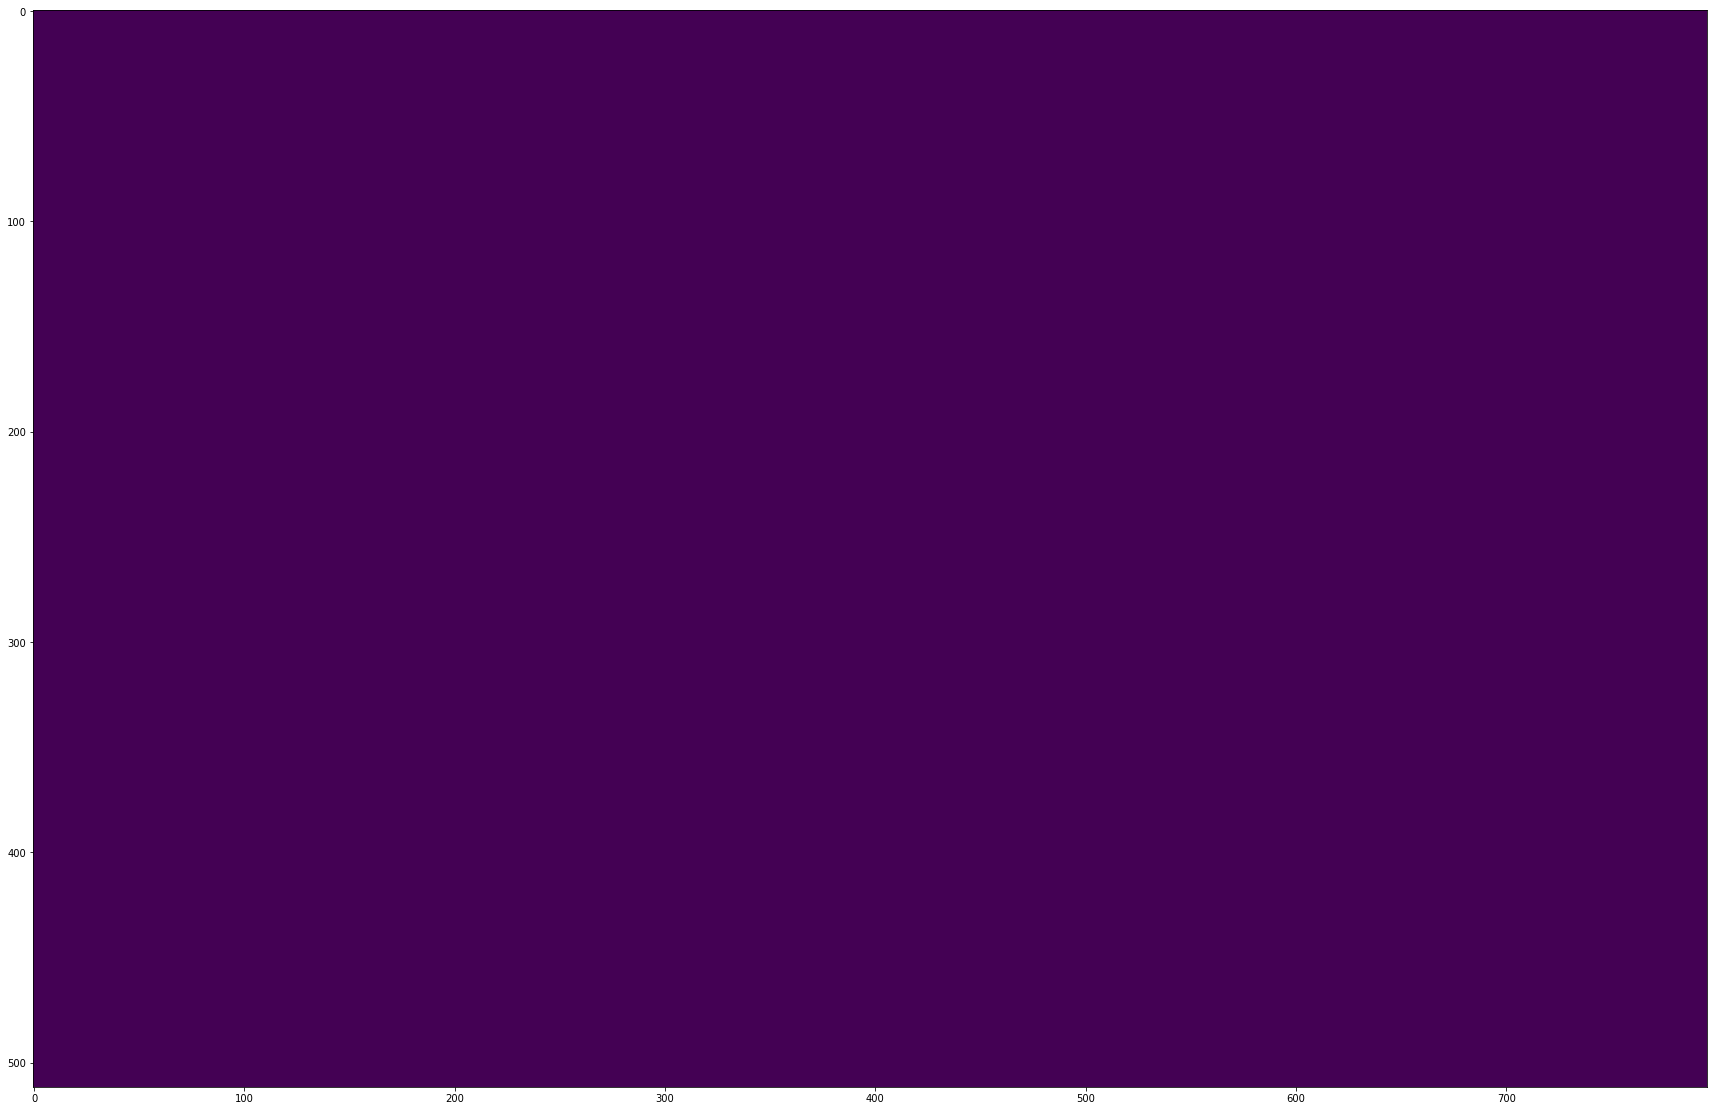

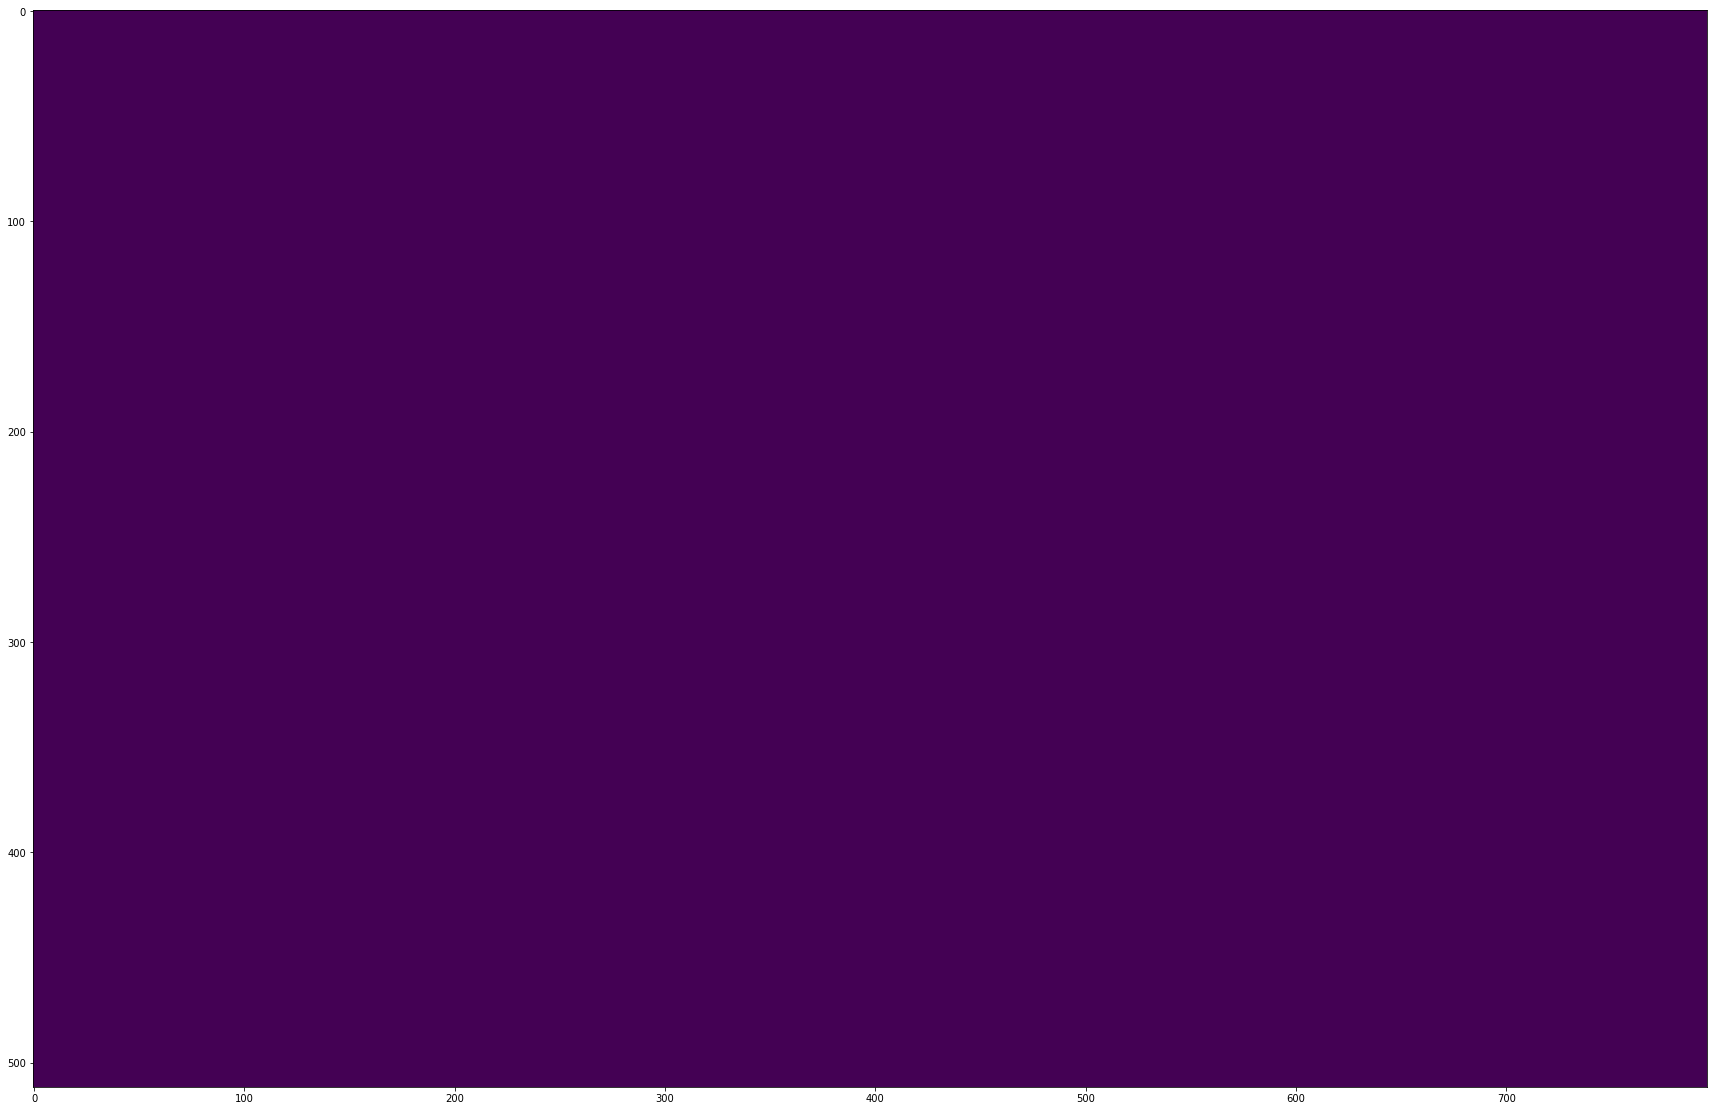

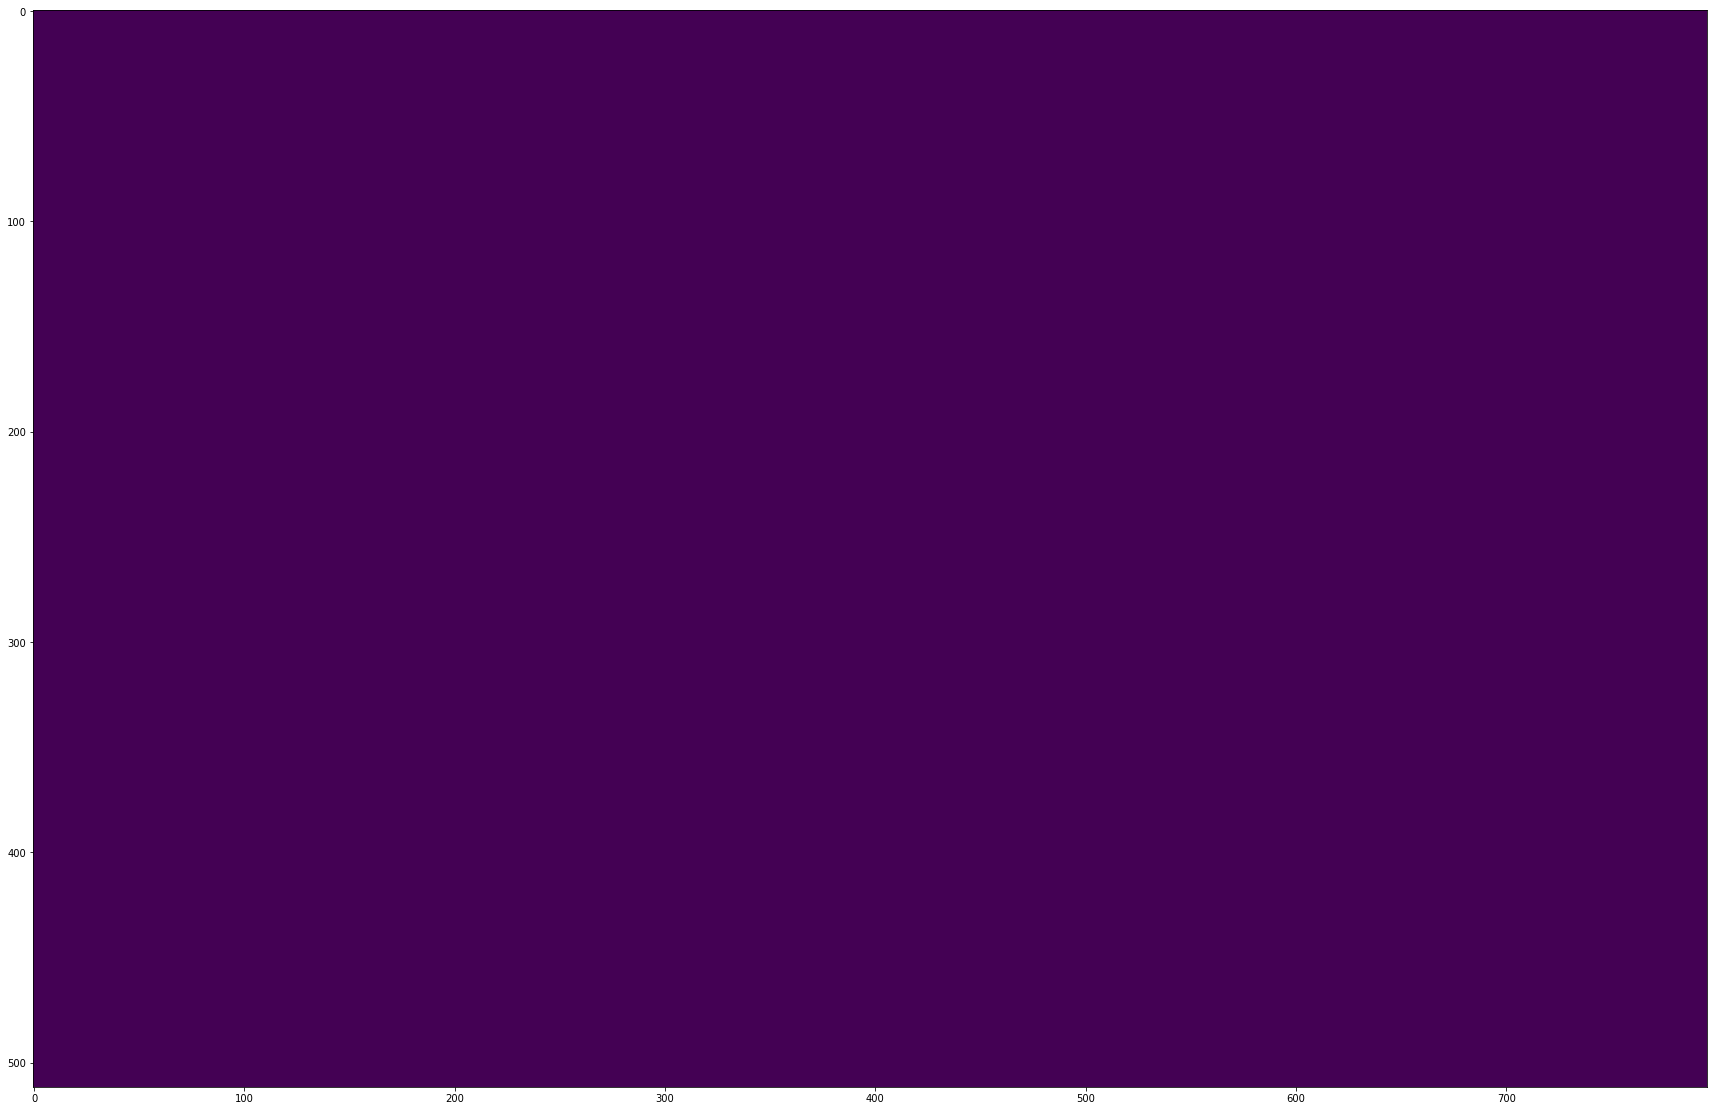

Error in callback <function flush_figures at 0x000001A493A1AA60> (for post_execute):


KeyboardInterrupt: 

In [77]:
%matplotlib inline
for i in range(stack.shape[1]):
    fig, ax = plt.subplots(figsize = [30,20])
    ax.imshow(stack[0,i,:,:])
# fig.show()

(26, 407552) (26, 407552)


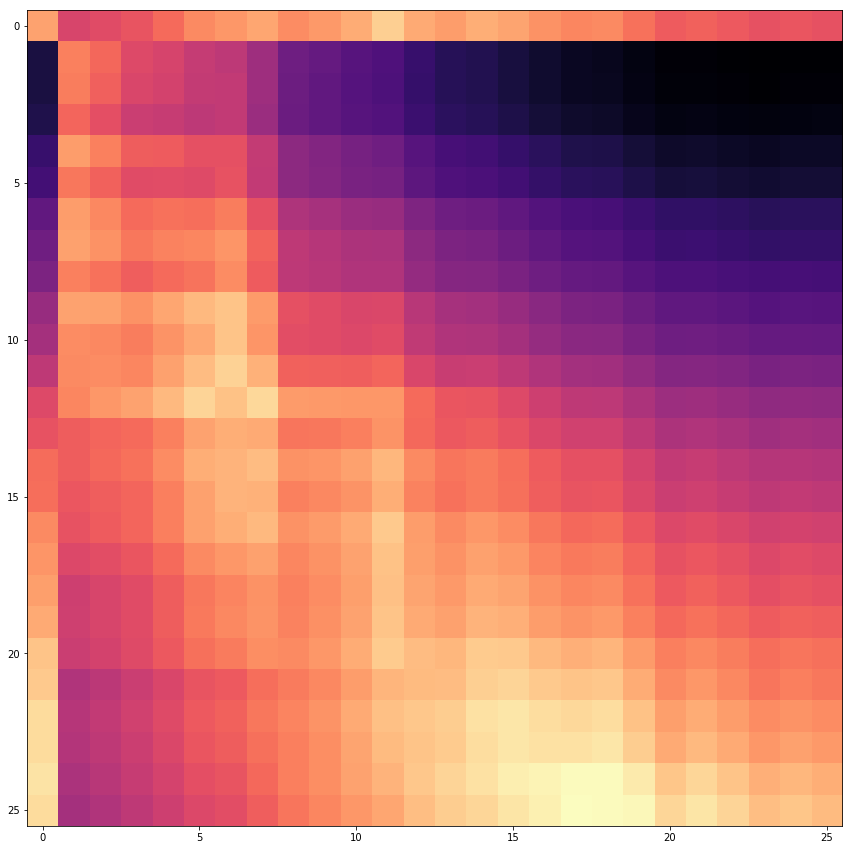

In [125]:
# read in h5 files

scan0,scan1 = "pre_000_000_chan1.h5", "pre_001_001_chan1.h5"
fname0,fname1 = os.path.join(predir,scan0),os.path.join(predir,scan1)
with h5py.File(fname0,'r') as f0:
    with h5py.File(fname1,'r') as f1:
        stack0, stack1 = f0['data'][:,:,:],f1['data'][:,:,:]
stack0_f,stack1_f = stack0.reshape([stack0.shape[0],-1]), stack1.reshape([stack1.shape[0],-1])
stack0_f,stack1_f = sp.stats.zscore(stack0_f,axis=1)/stack0_f.shape[1],sp.stats.zscore(stack1_f,axis=1)/stack1_f.shape[1]
corrmat = np.matmul(stack0_f,stack1_f.T)
print(stack0_f.shape,stack1_f.shape)
fig,ax = plt.subplots(figsize=[15,15])
ax.imshow(corrmat,cmap='magma')


[  0. -25. -23. -21. -19. -17. -15. -13. -11.  -9.  -7.  -5.  -3.  -1.
   1.   3.   5.   7.   9.  11.  13.  15.  17.  19.  21.  23.]
max corr at -5.0
zstack index 11


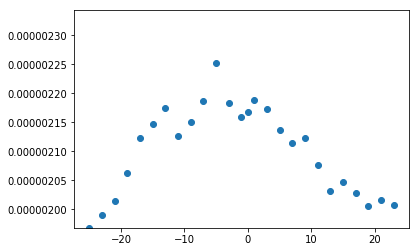

In [127]:
        
fig,ax = plt.subplots()
print(knobby_z)
ax.scatter(knobby_z,corrmat[0,:])
ax.set_ylim([np.amin(corrmat[0,:]),np.amax(corrmat)])
print('max corr at', knobby_z[np.argmax(corrmat[0,:])])
print('zstack index',np.argmax(corrmat[0,:]))

(26, 512, 796)


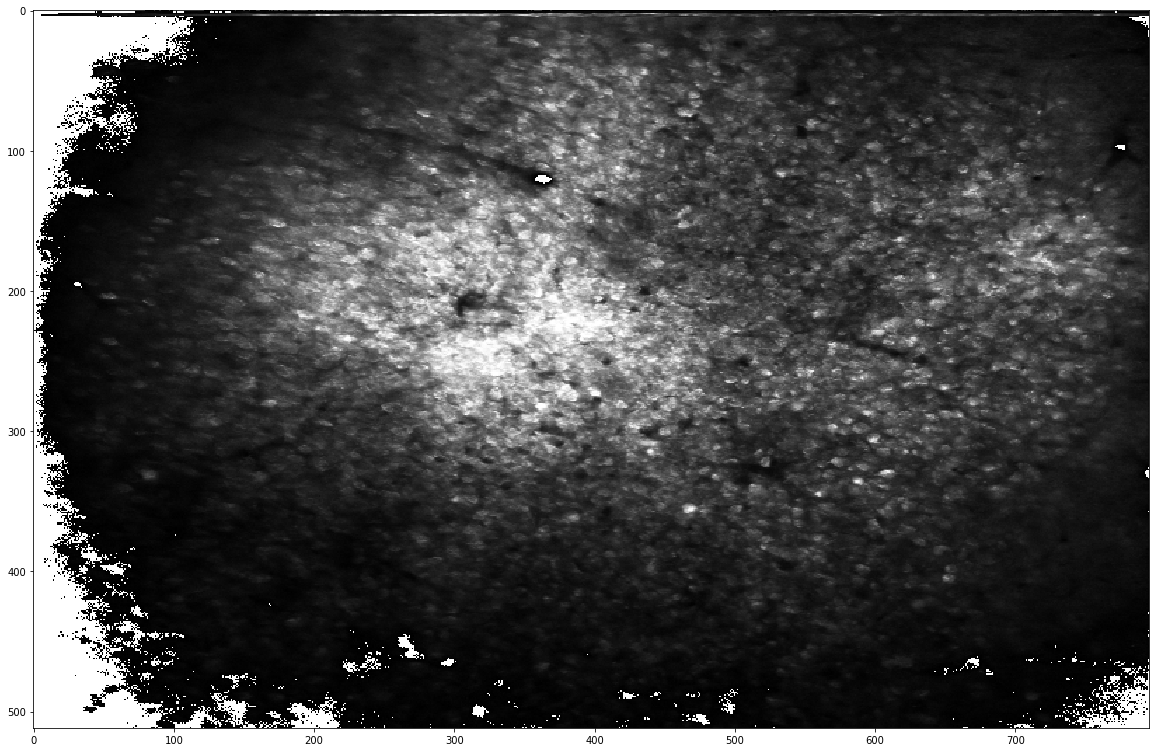

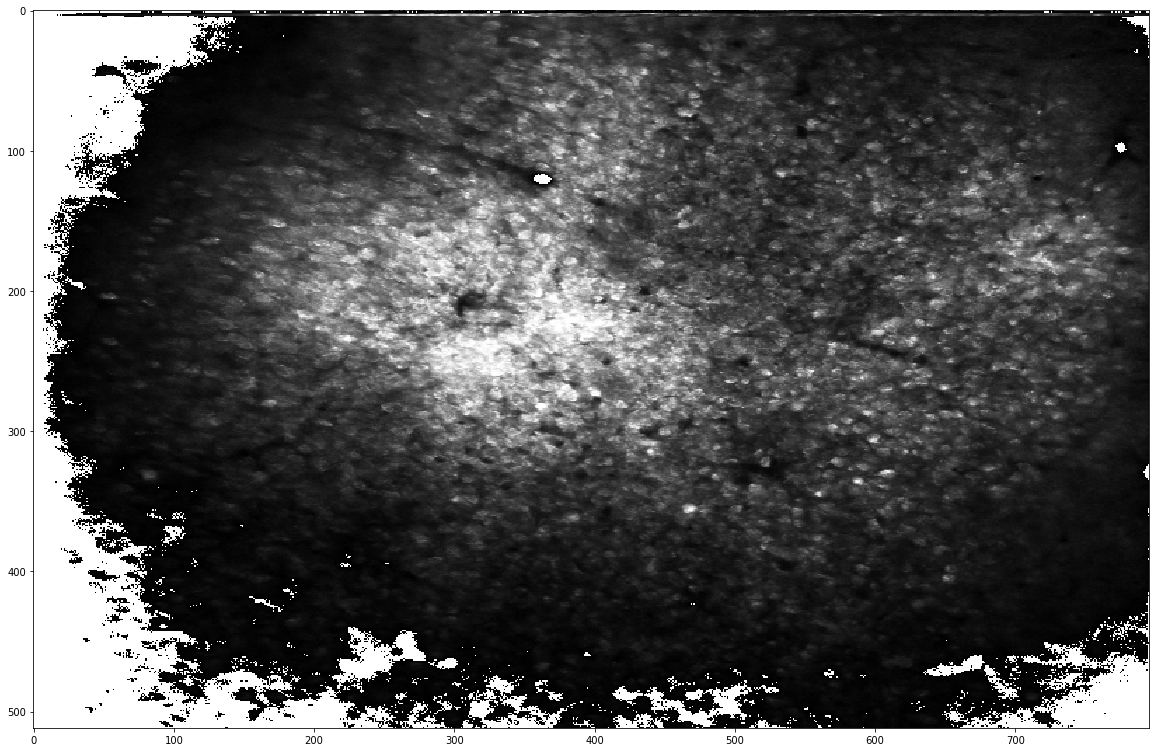

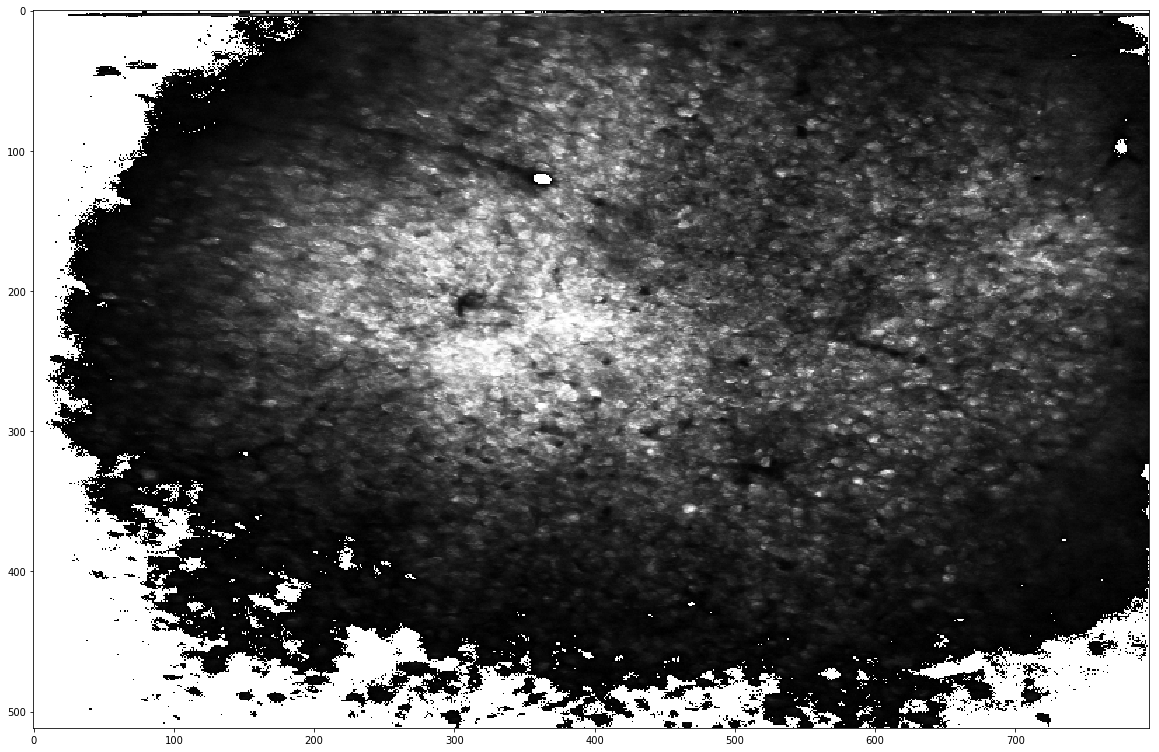

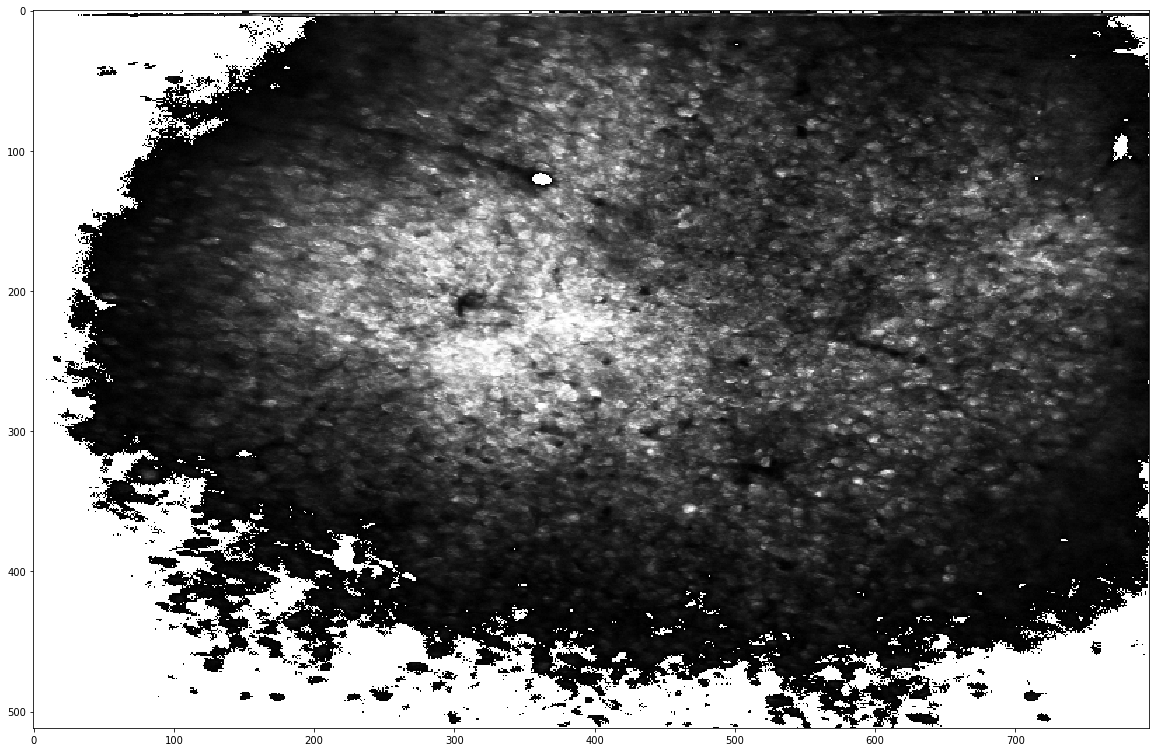

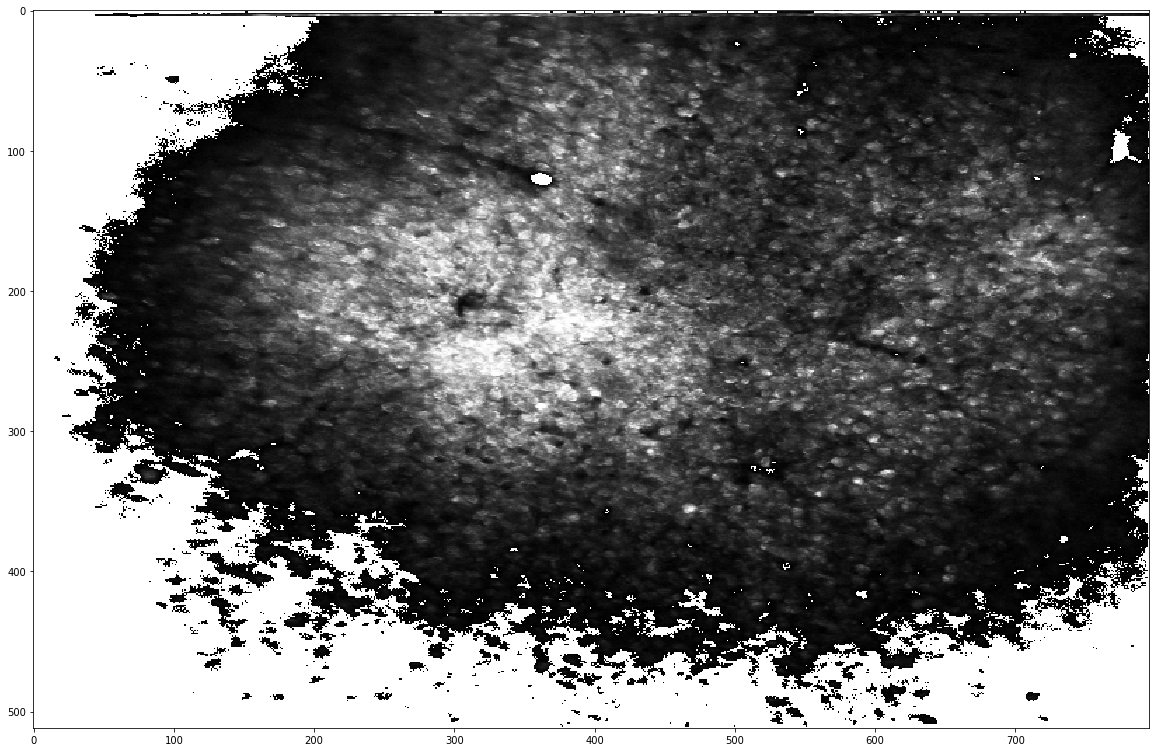

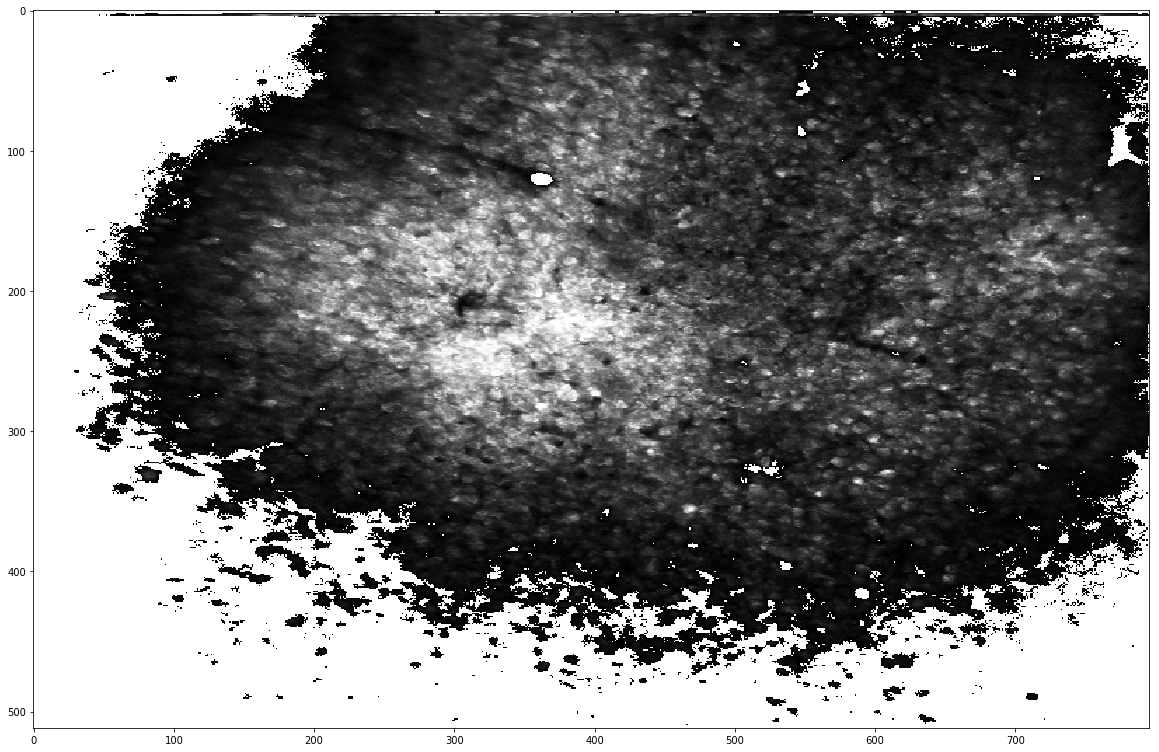

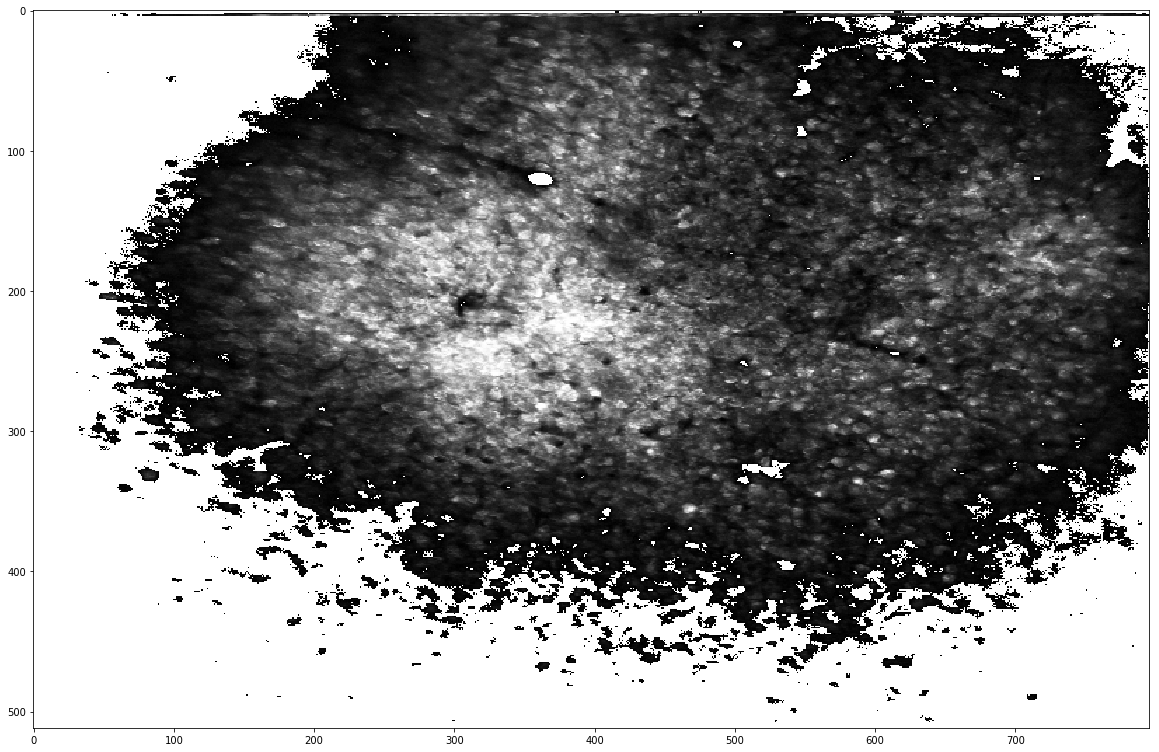

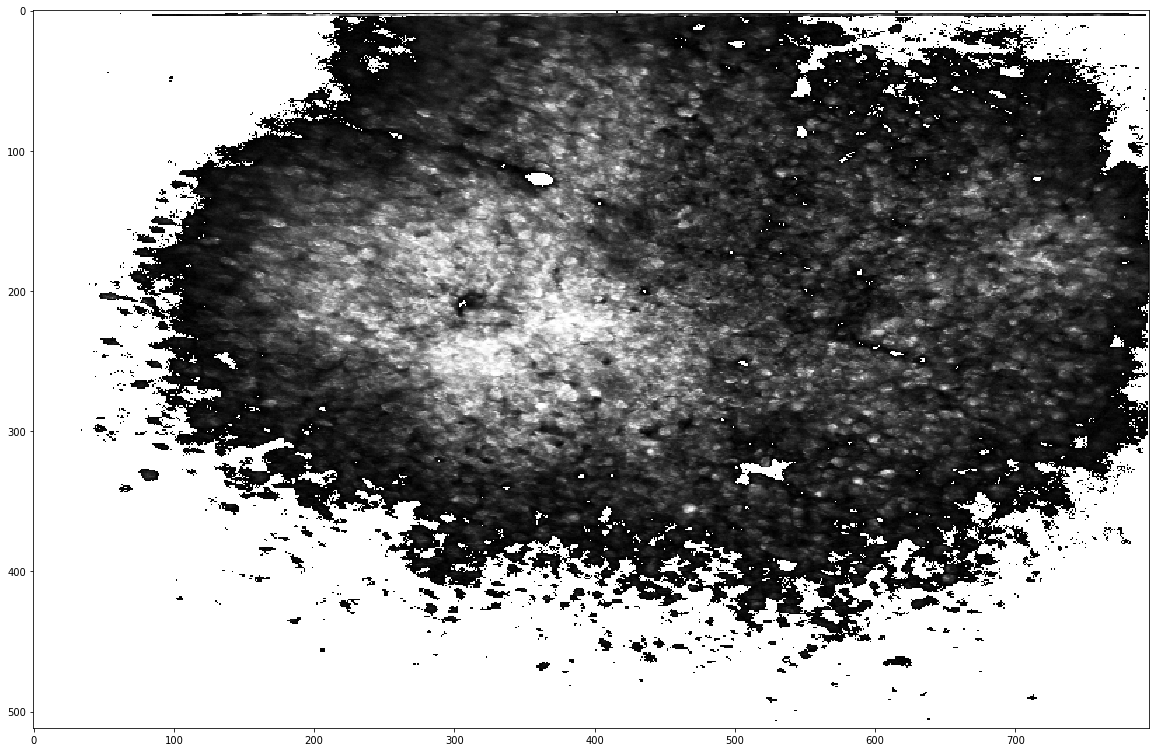

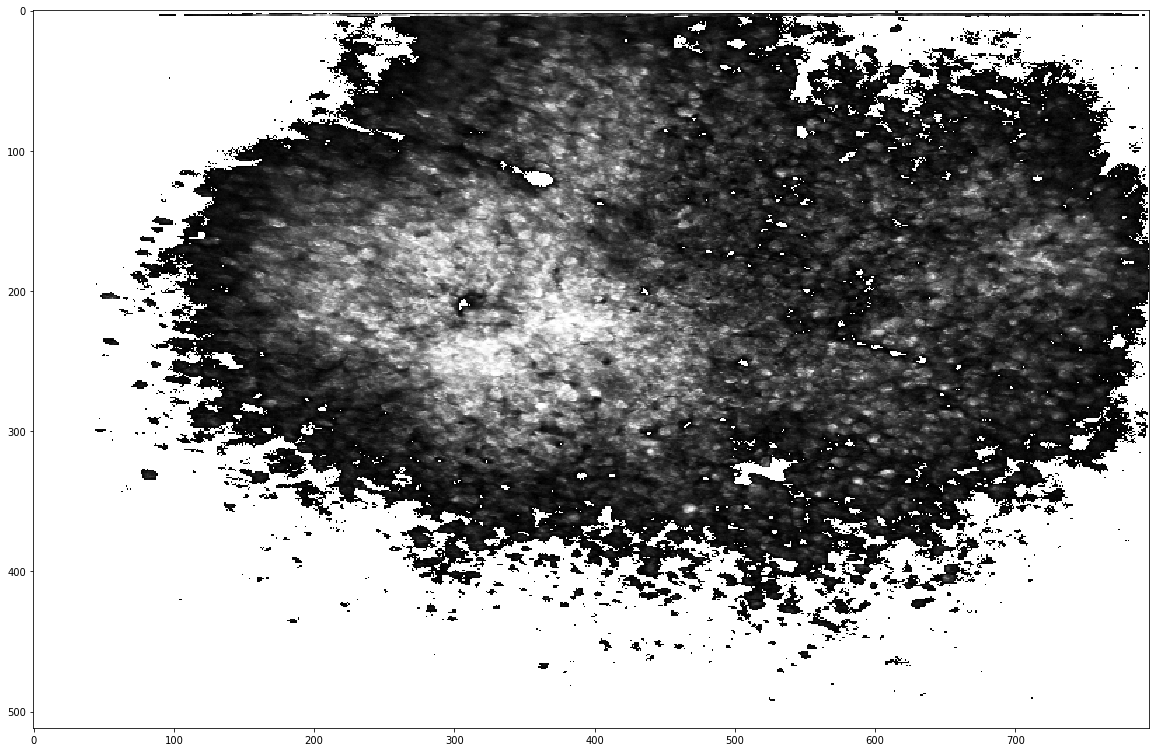

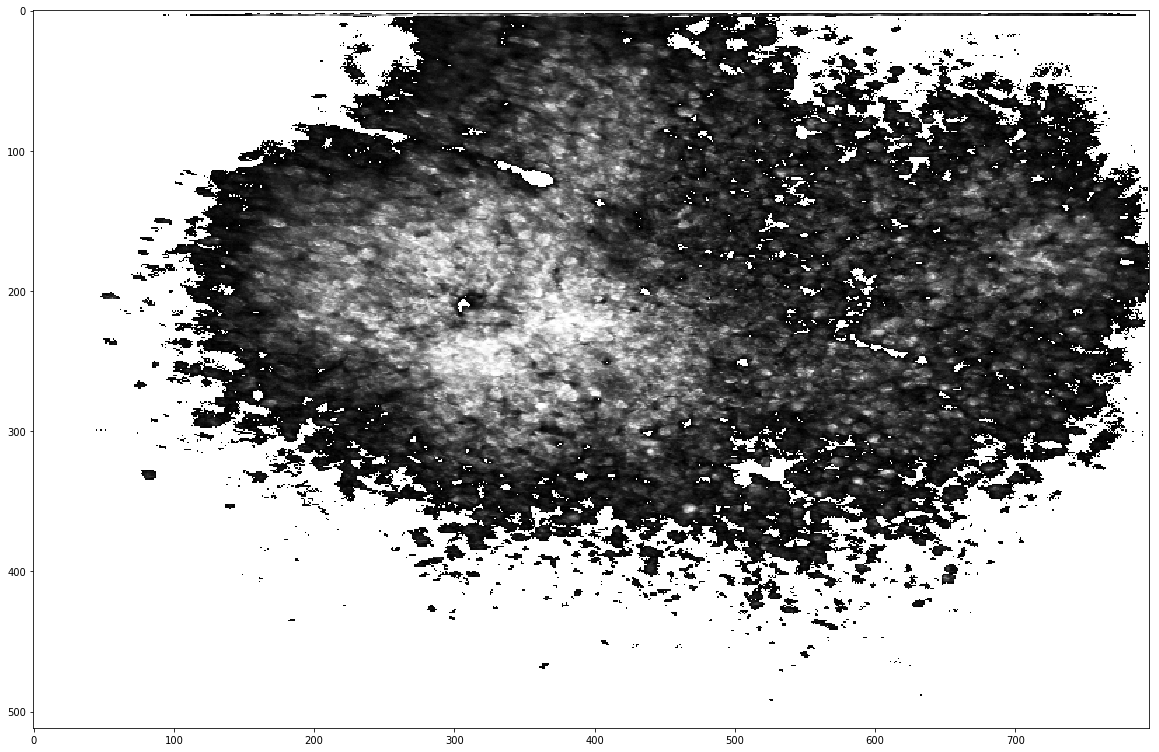

In [131]:
print(stack1.shape)


a = np.linspace(5,50,num=10)
im = np.squeeze(stack1[0,:,:])

for _a in a.tolist():
    f,ax = plt.subplots(figsize=[20,20])
    thr = np.percentile(im,_a)
    _im = np.copy(np.float32(im))
    _im[im<thr]=np.nan
    ax.imshow(_im,cmap='gray')

In [ ]:
scan0,scan1 = "pre_000_000_chan1.h5", "pre_001_001_chan1.h5"
fname0,fname1 = os.path.join(predir,scan0),os.path.join(predir,scan1)
green = 